In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import plotly.graph_objects as go

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.2 MB/s eta 0:00:00


In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import numpy as np
import statsmodels.api as sm
import seaborn as sb
from textblob import TextBlob
import pmdarima as pm
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.util import ngrams
import plotly.graph_objs as go


In [ ]:
import numpy as np
from scipy.signal import argrelextrema

In [ ]:
#yakir drive
df=pd.read_csv("/content/drive/MyDrive/פרוייקט גמר יקיר ומנגשה/5g.csv")

In [ ]:
#mangasha drive
# df=pd.read_csv("/content/drive/MyDrive/פרוייקט גמר יקיר ומנגשה/la5g-ym.csv")

In [ ]:
df.shape

(414157, 13)

In [ ]:
# Convert datetime_column to a datetime type
df['created_at'] = pd.to_datetime(df['created_at'])

# Create a new date column
df['date_column'] = df['created_at'].dt.date

In [ ]:
# sort the DataFrame by the date_column
df = df.sort_values('created_at').reset_index(drop=True)

In [ ]:
df.dtypes

created_at         datetime64[ns, UTC]
id_b36                          object
author_idb36                    object
id                               int64
original_text                   object
metric_retweets                  int64
metric_likes                     int64
metric_replies                   int64
urls                            object
media_keys                      object
lang                            object
author_id                        int64
event_id                         int64
date_column                     object
dtype: object

In [ ]:
# delete the languges that has less then 100 tweets:

# group the data by language and compute the count of tweets for each language
lang_counts = df.groupby('lang').count()['original_text']

# filter out the languages that have less than 100 tweets
filtered_langs = lang_counts[lang_counts >= 100].index

# filter the dataframe to keep only the tweets in the filtered languages
df = df[df['lang'].isin(filtered_langs)]


disprictive stats:


In [ ]:
# Total number of tweets: Get the total number of tweets in your DataFrame.
total_tweets = len(df)

# Tweet statistics: Calculate the mean, median, standard deviation, minimum, and maximum for the metrics of retweets, likes, and replies.
tweet_stats = df[['metric_retweets', 'metric_likes', 'metric_replies']].describe()

# Language distribution: Get the number of tweets for each language and the percentage of the total tweets.
language_counts = df['lang'].value_counts()
language_percentages = df['lang'].value_counts(normalize=True) * 100

# Most active users: Find the users with the highest number of tweets in the dataset.
top_users = df['author_id'].value_counts().head(10)

# Date range: Determine the date range of your dataset.
min_date = df.index.min()
max_date = df.index.max()

In [ ]:
print(f"Total tweets: {total_tweets}")
print(f"\nTweet statistics:\n{tweet_stats}")
print(f"\nLanguage distribution:\n{language_counts}\n\nLanguage percentages:\n{language_percentages}")
print(f"\nMost active users:\n{top_users}")
print(f"\nDate range: {min_date} to {max_date}")

Total tweets: 413994

Tweet statistics:
       metric_retweets   metric_likes  metric_replies
count    413994.000000  413994.000000   413994.000000
mean          1.694744       8.126606        0.888008
std          57.148859     291.713249       12.874608
min           0.000000       0.000000        0.000000
25%           0.000000       0.000000        0.000000
50%           0.000000       0.000000        0.000000
75%           0.000000       2.000000        1.000000
max       24982.000000  125712.000000     3193.000000

Language distribution:
en    326118
fr     23292
pt     15966
it     14096
nl     12884
de     10496
pl      3526
fi      1281
cs       975
el       961
lt       949
da       774
ro       607
sl       400
bg       383
iw       355
lv       324
et       232
es       198
hu       177
Name: lang, dtype: int64

Language percentages:
en    78.773605
fr     5.626168
pt     3.856578
it     3.404880
nl     3.112122
de     2.535302
pl     0.851703
fi     0.309425
cs     0.23551

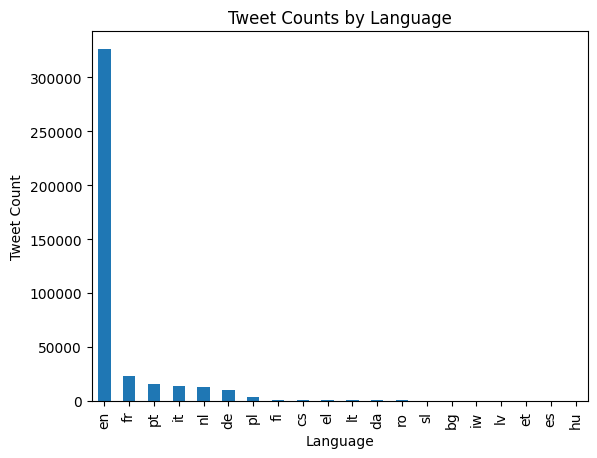

In [ ]:
import plotly.tools as tls
import plotly.io as pio
# create a bar chart of the tweet counts by language
language_counts.plot.bar()

# set the title and labels for the chart
plt.title('Tweet Counts by Language')
plt.xlabel('Language')
plt.ylabel('Tweet Count')

# display the chart
plt.show()



# New Section

In [ ]:
# date range

# group the data by language and compute the minimum and maximum dates for each group
date_range = df.groupby('lang')['date_column'].agg(['min', 'max'])

# print the resulting dataframe
print(date_range)

             min         max
lang                        
bg    2020-02-05  2022-09-23
cs    2020-01-26  2022-09-29
da    2020-01-29  2022-09-17
de    2020-01-21  2022-09-29
el    2020-01-30  2022-09-19
en    2020-01-09  2022-09-29
es    2020-02-26  2022-10-08
et    2020-02-01  2022-08-30
fi    2020-02-02  2022-09-27
fr    2020-01-22  2022-09-29
hu    2020-01-31  2022-09-07
it    2020-01-23  2022-09-29
iw    2020-01-28  2022-09-26
lt    2020-01-25  2022-08-30
lv    2020-01-30  2022-09-29
nl    2020-01-22  2022-09-29
pl    2020-01-28  2022-09-29
pt    2020-01-23  2022-09-29
ro    2020-01-26  2022-09-27
sl    2020-01-28  2022-09-01


In [ ]:
# compute the date range for each language
date_range['range'] = date_range['max'] - date_range['min']

# plot the date range for each language as a horizontal bar chart
dates=date_range['range'].sort_values(ascending=False)

dates

#added to the table manually

lang
en   994 days
de   982 days
fr   981 days
nl   981 days
it   980 days
pt   980 days
cs   977 days
pl   975 days
ro   975 days
lv   973 days
iw   972 days
fi   968 days
el   963 days
da   962 days
bg   961 days
es   955 days
hu   950 days
lt   948 days
sl   947 days
et   941 days
Name: range, dtype: timedelta64[ns]

In [ ]:
# AVG tweets amount per user per languege

# group the data by language and user ID, and count the number of tweets
mean_tweets_per_user = df.groupby(['lang', 'author_id'])['id'].count().groupby('lang').mean().round(2).sort_values(ascending=False)

# print the resulting dataframe
print(mean_tweets_per_user)

#added to the table manually

lang
it    1.96
nl    1.82
pl    1.72
en    1.62
fr    1.57
de    1.50
el    1.48
bg    1.36
ro    1.32
fi    1.32
cs    1.31
da    1.28
iw    1.27
pt    1.25
hu    1.25
lv    1.25
sl    1.23
lt    1.14
es    1.10
et    1.07
Name: id, dtype: float64


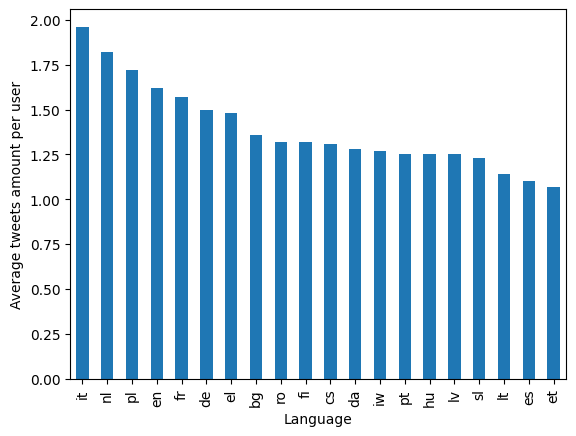

In [ ]:
# plot the average number of tweets per user for each language
mean_tweets_per_user.plot(kind='bar', xlabel='Language', ylabel='Average tweets amount per user')

# show the plot
plt.show()


In [ ]:
# avg tweets amounts per day per languege

# group the data by language and date, and count the number of tweets
tweets_per_day = df.groupby(['lang', pd.Grouper(key='created_at', freq='D')])['id'].count()

# group the data by language and compute the average tweets per day
tweets_avg_per_day = tweets_per_day.groupby('lang').mean().round(2).sort_values(ascending=False)

# print the resulting dataframe
print("tweets_avg_per_day:",tweets_avg_per_day)


#added to the table manually

tweets_avg_per_day: lang
en    330.75
fr     23.77
pt     17.58
it     14.81
nl     13.42
de     11.17
pl      4.62
lt      2.90
el      2.65
fi      2.44
es      2.25
ro      2.16
cs      2.06
bg      2.02
da      1.97
sl      1.63
lv      1.41
et      1.40
iw      1.31
hu      1.28
Name: id, dtype: float64


In [ ]:
#top tweets-
top_retweets = df.nlargest(10, 'metric_retweets')
top_likes = df.nlargest(10, 'metric_likes')
top_replies = df.nlargest(10, 'metric_replies')


In [ ]:
from scipy.signal import argrelextrema

# define a custom color palette with distinct colors for each language
language_colors = {'ar': '#FF7F50', 'fr': '#40E0D0', 'es': '#FFC0CB', 'pt': '#00FF00', 'it': '#0000FF', 'ja': '#FFA500', 'tr': '#800080', 'de': '#FF0000', 'ko': '#008080', 'ru': '#800000', 'fa': '#800000', 'nl': '#008000', 'sv': '#FFFF00', 'da': '#8B0000', 'pl': '#FF00FF'}

# convert the 'created_at' column to datetime format
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

# Create a list of languages to be removed
remove_langs = ['bg', 'cs', 'da', 'el', 'et', 'hu', 'iw', 'lv', 'sl','en']

# Filter out the languages in 'remove_langs' from the DataFrame
df_filtered = df[~df['lang'].isin(remove_langs)]

# group the data by date and language, and count the number of tweets
tweets_per_day = df_filtered.groupby(['lang', 'created_at'])['id'].count().reset_index()

# pivot the table to create a separate column for each language
tweets_per_day_pivot = tweets_per_day.pivot(index='created_at', columns='lang', values='id')

# Create a line chart of tweets per day for each language

from scipy.signal import argrelextrema

fig = go.Figure()
peaks = {}
N = 5  # Number of top peaks you want to keep for each language

for column in tweets_per_day_pivot.columns:
    fig.add_trace(go.Scatter(x=tweets_per_day_pivot.index,
                             y=tweets_per_day_pivot[column],
                             mode='lines', name=column,
                             line=dict(color=language_colors.get(column, '#333333'))))

    # Find local maxima
    y = tweets_per_day_pivot[column].values

    # Extract the dates and values of the local maxima
    local_maxima = argrelextrema(y, np.greater)
    dates = tweets_per_day_pivot.index[local_maxima]
    values = y[local_maxima]

    # Sort the peaks by the number of tweets and keep the top N
    peaks[column] = sorted(list(zip(dates, values)), key=lambda x: x[1], reverse=True)[:N]

print("Top N peaks for each language:")
for lang, lang_peaks in peaks.items():
    print(f"Language: {lang}")
    for i, (date, value) in enumerate(lang_peaks):
        print(f"  {i + 1}. Date: {date}, Number of Tweets: {value}")
    print()

# Set the chart type to a line chart
fig.update_layout(xaxis_title='Date',
                  yaxis_title='Number of Tweets',
                  title='Tweets per Day by Language (excluding English)')

# Show the chart
fig.show()



Top N peaks for each language:
Language: de
  1. Date: 2020-06-07, Number of Tweets: 318.0
  2. Date: 2020-04-06, Number of Tweets: 155.0
  3. Date: 2020-05-09, Number of Tweets: 104.0
  4. Date: 2020-05-25, Number of Tweets: 92.0
  5. Date: 2020-04-18, Number of Tweets: 78.0

Language: es
  1. Date: 2020-06-07, Number of Tweets: 32.0

Language: fi
  1. Date: 2020-06-07, Number of Tweets: 50.0
  2. Date: 2020-06-26, Number of Tweets: 40.0
  3. Date: 2020-03-29, Number of Tweets: 28.0
  4. Date: 2020-04-14, Number of Tweets: 25.0
  5. Date: 2020-04-20, Number of Tweets: 15.0

Language: fr
  1. Date: 2020-04-06, Number of Tweets: 384.0
  2. Date: 2022-08-17, Number of Tweets: 240.0
  3. Date: 2020-08-30, Number of Tweets: 226.0
  4. Date: 2020-04-23, Number of Tweets: 155.0
  5. Date: 2020-09-15, Number of Tweets: 146.0

Language: it
  1. Date: 2020-04-06, Number of Tweets: 349.0
  2. Date: 2020-06-07, Number of Tweets: 345.0
  3. Date: 2020-05-05, Number of Tweets: 212.0
  4. Date: 2020

In [ ]:
# create a pivot table with "lang" as columns, "created_at" as index and count of tweets as values
tweets_pivot = pd.pivot_table(df, values='id', index=df['created_at'], columns='lang', aggfunc='count')

# convert the index to a datetime index
tweets_pivot.index = pd.to_datetime(tweets_pivot.index)

# resample the pivot table by day and fill any missing values with 0
tweets_pivot_resampled = tweets_pivot.resample('D').sum().fillna(0)

# print the resulting dataframe
tweets_pivot_resampled

lang         bg   cs   da   de   el   en   es   et   fi   fr   hu   it   iw  \
created_at                                                                    
2020-01-09  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2020-01-10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2020-01-11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2020-01-12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2020-01-13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2022-10-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-10-05  0.0  0.0  0.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-10-06  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-10-07  0.0  0.0  0.0  0.0  0.0  0.0  9.0  0.0  0.0  0.0  0.0  0.0  0.0   
2022-10-08  0.0  0.0  0.0  0.0  0.0  0.0  9.0  0.0  0.0  0.0  0.0  0.0  0.0   

lang         lt   lv   nl   pl   pt   ro   sl  
created_at                                     
2020-01-09  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2020-01-13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  ...  
2022-10-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-10-05  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-10-06  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-10-07  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2022-10-08  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1004 rows x 20 columns]

In [ ]:
# find the date, lang, and the value with the highest count
highest_count = tweets_pivot_resampled.stack().max()
date, lang = tweets_pivot_resampled.stack().idxmax()

# print the date, lang, and the value with the highest count
print("Date with the highest count: ", date.date())
print("Lang with the highest count: ", lang)
print("Highest count: ", highest_count)


Date with the highest count:  2020-04-04
Lang with the highest count:  en
Highest count:  11665.0


In [ ]:
pt_pivot = tweets_pivot_resampled['pt']
highest_count_fr = pt_pivot.max()
date_fr = pt_pivot.idxmax()

print("Date with the highest count for lang=pt: ", date_fr.date())
print("Highest count for lang=pt: ", highest_count_fr)

Date with the highest count for lang=pt:  2020-06-07
Highest count for lang=pt:  3600.0


without lang pt,en and date 2020-06-07

In [ ]:
#cross coratlation-

# Function to calculate rolling correlations with different lags
def rolling_corr_with_lag(series1, series2, max_lag=30):
    correlations = {}
    for lag in range(max_lag + 1):
        if lag == 0:
            corr = series1.corr(series2)
        else:
            corr = series1.corr(series2.shift(lag))
        correlations[lag] = corr
    return correlations

# Group by language and date, and count the number of tweets
grouped_df =df.groupby(['lang', 'date_column']).size().reset_index(name='tweet_count')

# Pivot the table to have languages as columns and dates as rows
pivot_df = grouped_df.pivot_table(index='date_column', columns='lang', values='tweet_count', fill_value=0)

# Calculate the rolling correlations with different lags for each unique language pair
all_correlations = {}
columns = list(pivot_df.columns)
for i, col1 in enumerate(columns):
    for col2 in columns[i + 1:]:
        corr_with_lags = rolling_corr_with_lag(pivot_df[col1], pivot_df[col2])
        all_correlations[(col1, col2)] = corr_with_lags

# Find and print the strongest correlations along with the corresponding languages, lags, and dates
strongest_correlations = sorted(all_correlations.items(), key=lambda x: max(x[1].values()), reverse=True)

print("Strongest correlations between languages and time series data with lags and dates:")
for i, (language_pair, corr_with_lags) in enumerate(strongest_correlations[:10]):
    strongest_lag = max(corr_with_lags, key=corr_with_lags.get)
    strongest_corr = corr_with_lags[strongest_lag]
    shifted_series = pivot_df[language_pair[1]].shift(strongest_lag)
    max_corr_date = (pivot_df[language_pair[0]] * shifted_series).idxmax()
    print(f"{i + 1}. {language_pair[0]} vs {language_pair[1]}: Correlation = {strongest_corr:.2f}, Lag = {strongest_lag}")



Strongest correlations between languages and time series data with lags and dates:
1. lt vs pt: Correlation = 0.89, Lag = 0
2. es vs pt: Correlation = 0.88, Lag = 0
3. es vs lt: Correlation = 0.79, Lag = 0
4. en vs it: Correlation = 0.78, Lag = 0
5. de vs it: Correlation = 0.78, Lag = 0
6. it vs pl: Correlation = 0.74, Lag = 0
7. en vs ro: Correlation = 0.70, Lag = 0
8. de vs pl: Correlation = 0.70, Lag = 1
9. el vs nl: Correlation = 0.70, Lag = 0
10. en vs pl: Correlation = 0.70, Lag = 0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    'Language Pair': ['Lithuanian vs Portuguese', 'Spanish vs Portuguese', 'Spanish vs Lithuanian', 'English vs Italian', 'German vs Italian', 'Italian vs Polish', 'English vs Romanian', 'Greek vs Dutch', 'English vs Polish'],
    'Correlation': [0.89, 0.88, 0.79, 0.78, 0.78, 0.74, 0.70, 0.70, 0.70],
    'Lag': [0, 0, 0, 0, 0, 0, 0, 0, 0]
}

In [ ]:
plt.figure(figsize =(15, 15))

sb.heatmap(corr, cmap="YlGnBu", annot=True)


In [ ]:
lags = [1, 2, 3, 4, 5,]

# Calculate autocorrelation for specific lags for each language
autocorrelation_results = {}

for lang in pivot_df.columns:
    autocorrelation_values = {}
    for lag in lags:
        autocorrelation_values[lag] = pivot_df[lang].autocorr(lag=lag)
    autocorrelation_results[lang] = autocorrelation_values
# Print the autocorrelation results
for lang, autocorr_values in autocorrelation_results.items():
    print(f"Autocorrelation for {lang} tweets:")
    for lag, autocorr_value in autocorr_values.items():
        print(f"Lag {lag}: {autocorr_value:.4f}")
    print("\n" + "=" * 30 + "\n")


Autocorrelation for bg tweets:
Lag 1: 0.5647
Lag 2: 0.5039
Lag 3: 0.5830
Lag 4: 0.5345
Lag 5: 0.5088


Autocorrelation for cs tweets:
Lag 1: 0.4885
Lag 2: 0.4793
Lag 3: 0.4350
Lag 4: 0.3742
Lag 5: 0.4050


Autocorrelation for da tweets:
Lag 1: 0.5153
Lag 2: 0.3749
Lag 3: 0.3024
Lag 4: 0.2996
Lag 5: 0.2987


Autocorrelation for de tweets:
Lag 1: 0.6487
Lag 2: 0.4994
Lag 3: 0.4714
Lag 4: 0.4308
Lag 5: 0.3964


Autocorrelation for el tweets:
Lag 1: 0.5549
Lag 2: 0.4394
Lag 3: 0.4240
Lag 4: 0.4292
Lag 5: 0.4341


Autocorrelation for en tweets:
Lag 1: 0.9163
Lag 2: 0.8012
Lag 3: 0.7195
Lag 4: 0.6378
Lag 5: 0.5656


Autocorrelation for es tweets:
Lag 1: 0.5358
Lag 2: 0.1739
Lag 3: 0.0861
Lag 4: 0.0387
Lag 5: 0.0355


Autocorrelation for et tweets:
Lag 1: 0.3221
Lag 2: 0.1957
Lag 3: 0.2806
Lag 4: 0.2538
Lag 5: 0.2075


Autocorrelation for fi tweets:
Lag 1: 0.3762
Lag 2: 0.1933
Lag 3: 0.2213
Lag 4: 0.1574
Lag 5: 0.1773


Autocorrelation for fr tweets:
Lag 1: 0.7431
Lag 2: 0.6328
Lag 3: 0.5715


In [ ]:
import pandas as pd

lags = [1, 2, 3, 4, 5,]

# Calculate autocorrelation for specific lags for each language
autocorrelation_results = {}

for lang in pivot_df.columns:
    autocorrelation_values = {}
    for lag in lags:
        autocorrelation_values[lag] = pivot_df[lang].autocorr(lag=lag)
    autocorrelation_results[lang] = autocorrelation_values

# Convert the autocorrelation results to a DataFrame
autocorr_df = pd.DataFrame(autocorrelation_results)

# Print the DataFrame
print("print tadble the all auto corr","\n\n",autocorr_df)


print tadble the all auto corr 

          bg        cs        da        de        el        en        es  \
1  0.564733  0.488521  0.515346  0.648662  0.554858  0.916268  0.535785   
2  0.503858  0.479326  0.374918  0.499366  0.439404  0.801236  0.173947   
3  0.582960  0.434962  0.302360  0.471381  0.424022  0.719546  0.086138   
4  0.534535  0.374202  0.299587  0.430840  0.429218  0.637775  0.038737   
5  0.508825  0.404964  0.298678  0.396397  0.434079  0.565589  0.035548   

         et        fi        fr        hu        it        iw        lt  \
1  0.322120  0.376152  0.743131  0.249967  0.809362  0.146398  0.598905   
2  0.195669  0.193328  0.632759  0.152026  0.711629  0.078979  0.250440   
3  0.280623  0.221291  0.571467  0.135605  0.626623  0.044037  0.231349   
4  0.253789  0.157397  0.553193  0.135492  0.553540  0.065452  0.217405   
5  0.207500  0.177299  0.529941  0.123143  0.492242  0.080372  0.189373   

         lv        nl        pl        pt        ro        sl  


In [ ]:
#sentimatnel analysis:
import re

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions
    text = re.sub(r'\@\w+', '', text)
    #
    # Remove hashtags
    text = re.sub(r'\#\w+', '', text)

    # Remove special characters and digits
    text = re.sub(r'\W\d+', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Preprocess the tweets
df['clean_text'] = df['original_text'].apply(preprocess_text)

# Create a function to get sentiment polarity score for each tweet
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the 'clean_text' column to get sentiment polarity score for each tweet
df['sentiment_polarity'] = df['clean_text'].apply(get_sentiment)



In [ ]:
# Define a function to classify the sentiment based on the polarity score
def classify_sentiment(score):
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

# Apply the 'classify_sentiment' function to the 'sentiment_polarity' column to classify the sentiment of each tweet
df['sentiment'] = df['sentiment_polarity'].apply(classify_sentiment)

# Group the DataFrame by language and calculate the average sentiment polarity for each language
average_sentiment_by_lang = df.groupby('lang')['sentiment_polarity'].mean()

# Count the number of positive, negative, and neutral tweets for each language
sentiment_counts_by_lang = df.groupby(['lang', 'sentiment']).size().unstack(fill_value=0)

# Print the summary of sentiment analysis results
print("Average Sentiment Polarity by Language:")
print(average_sentiment_by_lang)
print("\nSentiment Counts by Language:")
print(sentiment_counts_by_lang)


Average Sentiment Polarity by Language:
lang
bg    0.005287
cs    0.020063
da    0.004617
de    0.017436
el   -0.004912
en    0.029312
es    0.000334
et    0.015692
fi    0.007418
fr    0.004680
hu    0.022361
it   -0.008618
iw    0.002817
lt   -0.011516
lv    0.012320
nl    0.014885
pl    0.012704
pt   -0.005227
ro    0.003111
sl    0.016508
Name: sentiment_polarity, dtype: float64

Sentiment Counts by Language:
sentiment  negative  neutral  positive
lang                                  
bg                5      371         7
cs               34      868        73
da               59      597       118
de              324     9470       702
el               18      923        20
en            81122   129555    115441
es                6      181        11
et               14      193        25
fi               25     1221        35
fr             1300    20172      1820
hu                4      160        13
it              914    12408       774
iw                0      353         

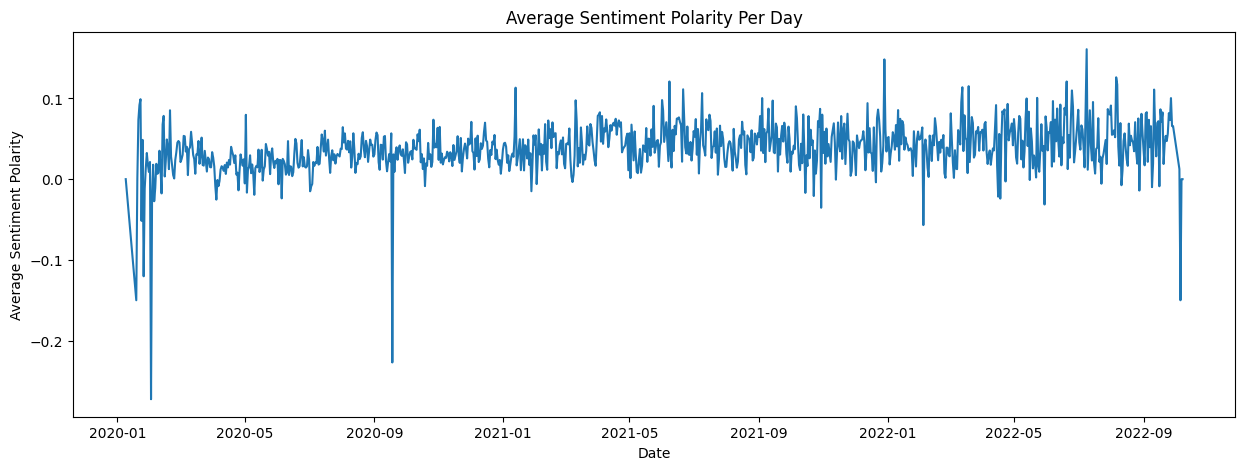

In [ ]:
# Group the DataFrame by date
grouped_df = df.groupby('created_at')

# Calculate the average sentiment polarity for each group
average_sentiment_per_day = grouped_df['sentiment_polarity'].mean()

# Plot the average sentiment polarity per day
plt.figure(figsize=(15, 5))
plt.plot(average_sentiment_per_day.index, average_sentiment_per_day.values)
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.title('Average Sentiment Polarity Per Day')
plt.show()


In [ ]:
pip install plotly


In [ ]:
# Create a Plotly line plot
fig = go.Figure()

# Add a line trace for the average sentiment polarity per day
fig.add_trace(go.Scatter(x=average_sentiment_per_day.index, y=average_sentiment_per_day.values, mode='lines', name='Average Sentiment Polarity'))

# Update the layout to include axis labels and a title
fig.update_layout(title='Average Sentiment Polarity Per Day', xaxis_title='Date', yaxis_title='Average Sentiment Polarity')

# Show the plot
fig.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


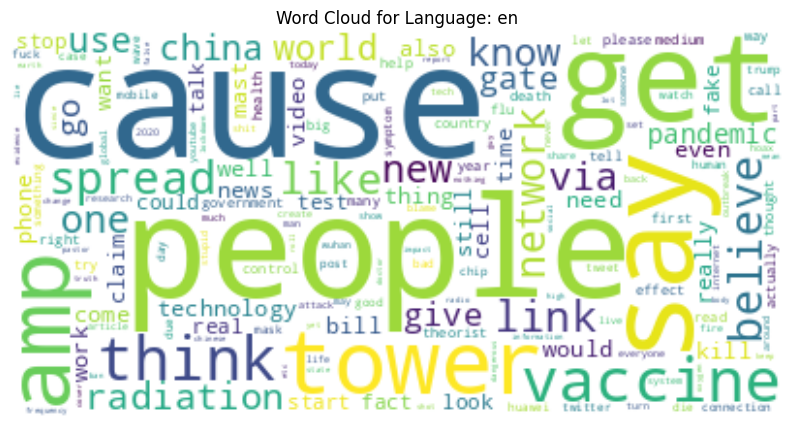

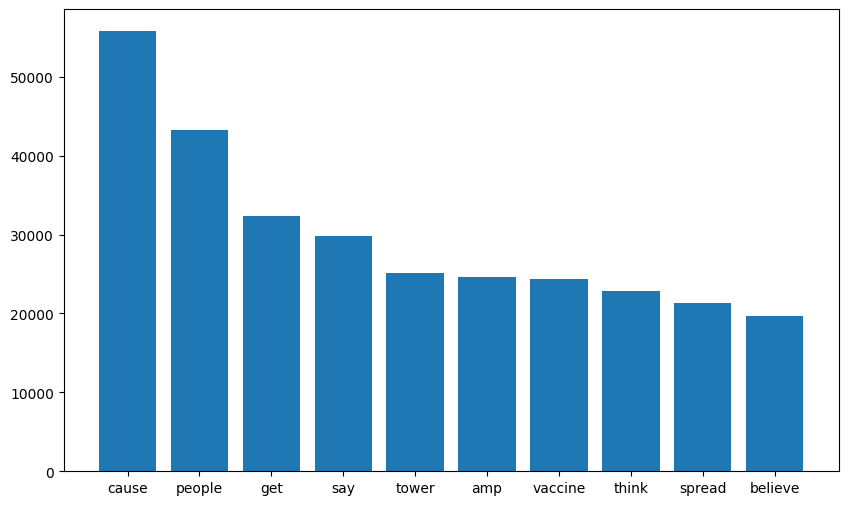

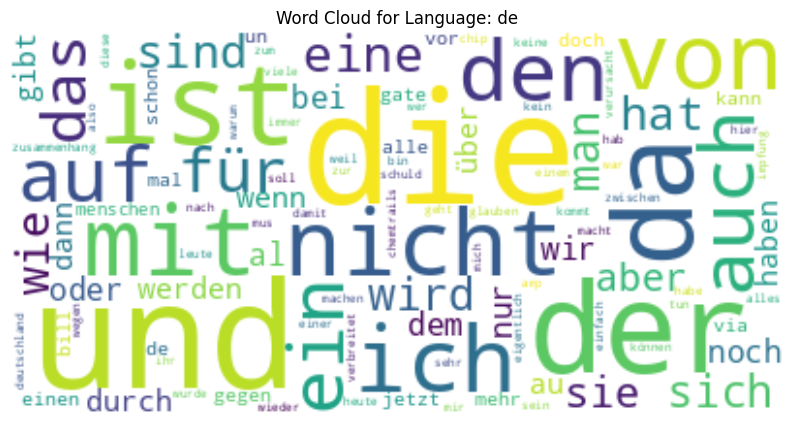

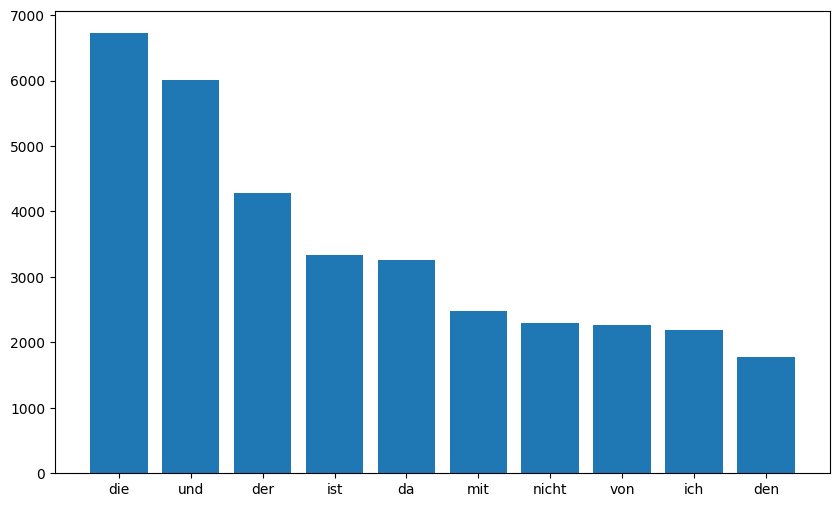

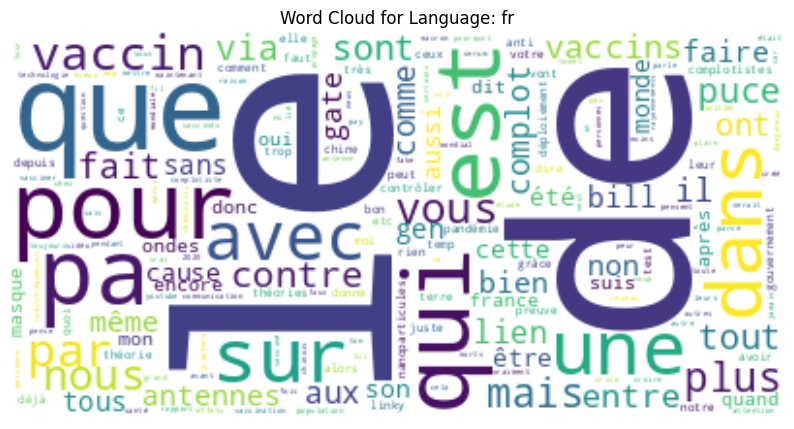

KeyboardInterrupt: ignored

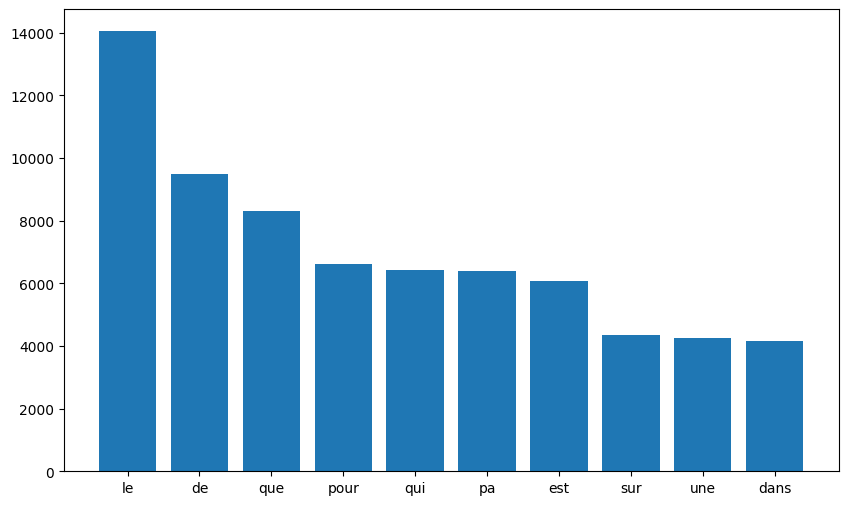

In [ ]:
# Download required resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

custom_stopwords = {
    'common': ['corona', 'coronavirus', 'covid', 'covid19', 'covid-19', 'covid 19', 'conspiracy', 'theory', 'virus', 'make', 'take', 'see']
}

def remove_custom_stopwords(tokens, custom_stopwords, lang):
    tokens = [token for token in tokens if token.lower() not in custom_stopwords['common']]
    return tokens

def get_wordnet_pos(word):
    """Map POS tag to first character for lemmatization"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemmatized_tokens

def preprocess_text(text, lang):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions
    text = re.sub(r'\@\w+', '', text)

    # Remove hashtags
    text = re.sub(r'\#\w+', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove conjunctions and stop words
    if lang in stopwords.fileids():
        stop_words = set(stopwords.words(lang))
    else:
        stop_words = set(stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.lower() not in stop_words and token.isalnum()]

    # Remove short words
    tokens = [token for token in tokens if len(token) > 2]

    # Lemmatize tokens
    tokens = lemmatize_tokens(tokens)

    # Remove custom stopwords
    tokens = remove_custom_stopwords(tokens, custom_stopwords, lang)

    return tokens

# Preprocess text and generate word clouds
languages = df['lang'].unique()

for lang in languages:
    lang_df = df[df['lang'] == lang]

    all_tokens = []
    for text in lang_df['original_text']:
        tokens = preprocess_text(text, lang)
        all_tokens.extend(tokens)

    word_counts = Counter(all_tokens)
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_counts)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Language: {lang}")
    plt.show()

    # Most frequent words visualization
    most_common_words = word_counts.most_common(10)
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)



RMSE for language bg: 0.27860889500945063
Forecast for the next 30 days for language bg: [0.31013242 0.18839643 0.38006203 0.33532891 0.27004048 0.27688225
 0.27199335 0.25220791 0.24116055 0.23329678 0.22351604 0.21458772
 0.20707041 0.19996748 0.19330826 0.18728094 0.18175712 0.17665497
 0.17197209 0.16767701 0.16372873 0.1601008  0.15676924 0.1537089
 0.15089738 0.1483148  0.14594251 0.1437633  0.14176147 0.13992261]


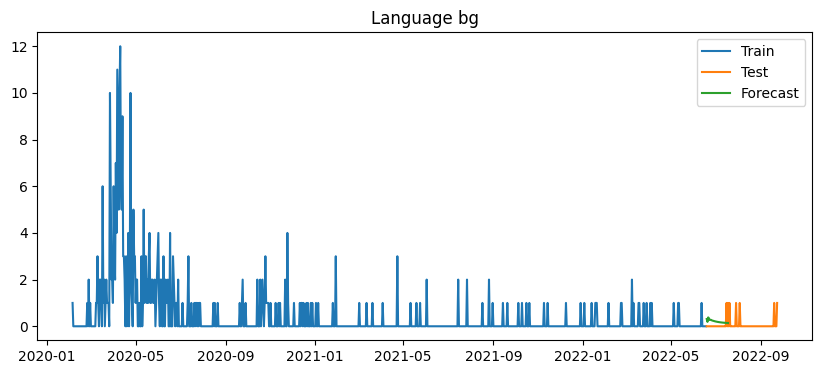

RMSE for language cs: 0.6680223393615696
Forecast for the next 30 days for language cs: [0.50175735 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735
 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735
 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735
 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735
 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735 0.50175735]


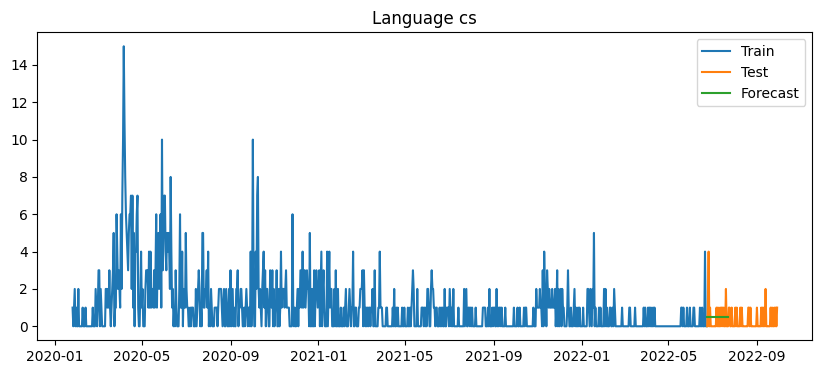

RMSE for language da: 0.39147449024322406
Forecast for the next 30 days for language da: [0.37158092 0.23130559 0.14795174 0.1648712  0.12956391 0.1584884
 0.12868018 0.15727245 0.12925835 0.1565312  0.12992915 0.15586201
 0.13057716 0.15522893 0.13119401 0.1546274  0.13178046 0.15405562
 0.13233793 0.1535121  0.13286784 0.15299545 0.13337156 0.15250434
 0.13385039 0.1520375  0.13430554 0.15159373 0.1347382  0.1511719 ]


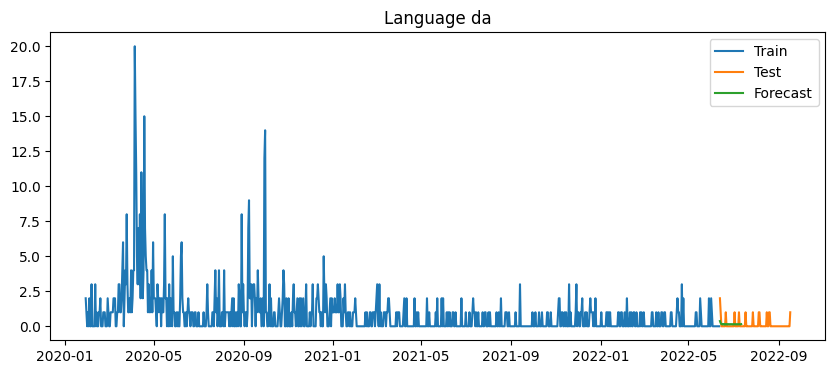

RMSE for language nl: 3.2214901757880923
Forecast for the next 30 days for language nl: [4.11993537 1.82706281 5.03420154 3.14660919 3.1744263  4.18053083
 3.51311309 3.51470376 3.84564102 3.61764395 3.61879698 3.72899775
 3.65175177 3.65261506 3.6894219  3.6633055  3.66377782 3.67607939
 3.66725484 3.66747667 3.67158841 3.66860734 3.66870325 3.67007749
 3.66907057 3.66911    3.66956925 3.66922918 3.66924485 3.66939831]


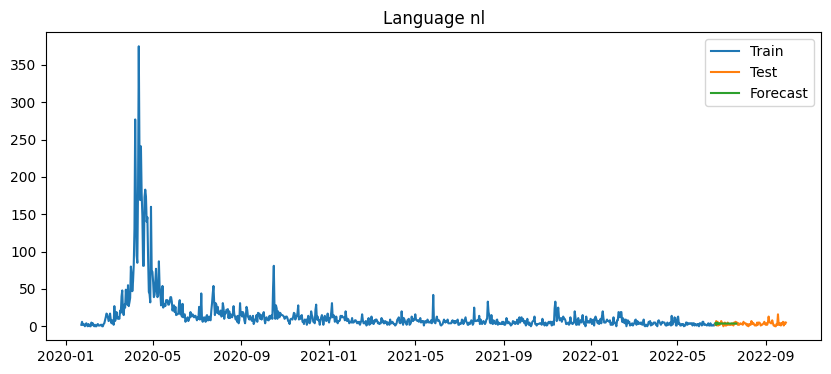

RMSE for language en: 21.026608123488376
Forecast for the next 30 days for language en: [71.9615018  66.26496401 66.26496401 66.26496401 66.26496401 66.26496401
 66.26496401 66.26496401 66.26496401 66.26496401 66.26496401 66.26496401
 66.26496401 66.26496401 66.26496401 66.26496401 66.26496401 66.26496401
 66.26496401 66.26496401 66.26496401 66.26496401 66.26496401 66.26496401
 66.26496401 66.26496401 66.26496401 66.26496401 66.26496401 66.26496401]


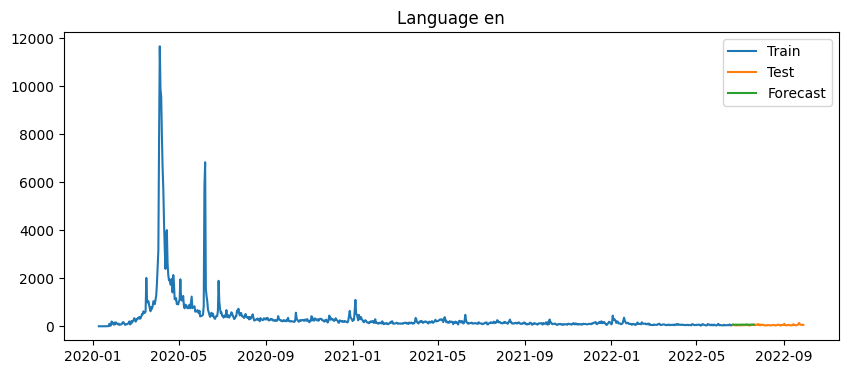

RMSE for language et: 0.2916125245316776
Forecast for the next 30 days for language et: [0.21646968 0.04399724 0.11834694 0.11834694 0.11834694 0.11834694
 0.11834694 0.11834694 0.11834694 0.11834694 0.11834694 0.11834694
 0.11834694 0.11834694 0.11834694 0.11834694 0.11834694 0.11834694
 0.11834694 0.11834694 0.11834694 0.11834694 0.11834694 0.11834694
 0.11834694 0.11834694 0.11834694 0.11834694 0.11834694 0.11834694]


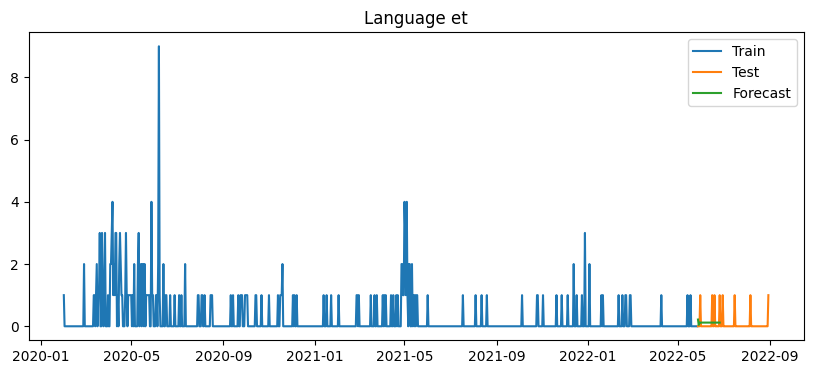

RMSE for language fr: 28.86834115055631
Forecast for the next 30 days for language fr: [12.619884   10.75510397  9.96119701  9.62320098  9.47930336  9.41804073
  9.39195893  9.38085493  9.37612754  9.37411491  9.37325806  9.37289326
  9.37273796  9.37267184  9.37264369  9.3726317   9.3726266   9.37262443
  9.3726235   9.37262311  9.37262294  9.37262287  9.37262284  9.37262283
  9.37262282  9.37262282  9.37262282  9.37262282  9.37262282  9.37262282]


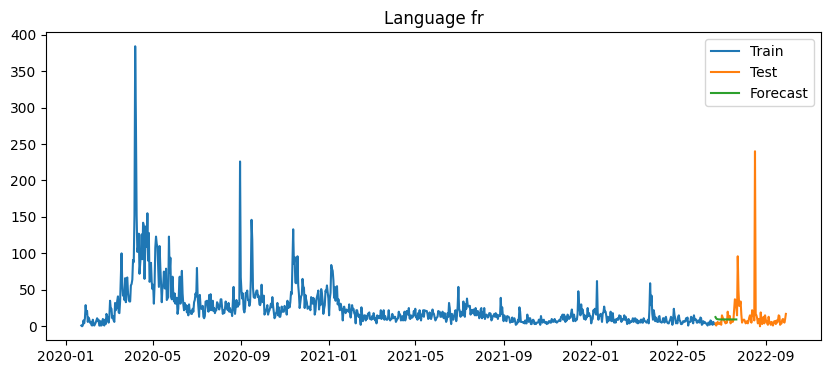

RMSE for language tl: 0.25221904681631574
Forecast for the next 30 days for language tl: [0.86822958 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958
 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958
 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958
 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958
 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958 0.86822958]


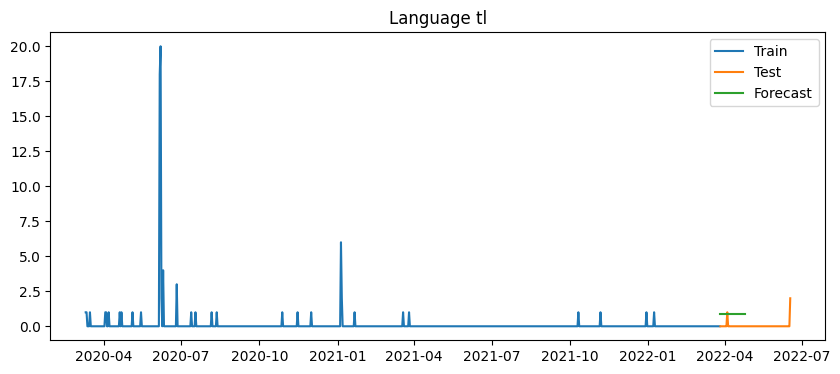

RMSE for language es: 1.3033283773306084
Forecast for the next 30 days for language es: [2.4206021  0.37968406 0.37968406 0.37968406 0.37968406 0.37968406
 0.37968406 0.37968406 0.37968406 0.37968406 0.37968406 0.37968406
 0.37968406 0.37968406 0.37968406 0.37968406 0.37968406 0.37968406
 0.37968406 0.37968406 0.37968406 0.37968406 0.37968406 0.37968406
 0.37968406 0.37968406 0.37968406 0.37968406 0.37968406 0.37968406]


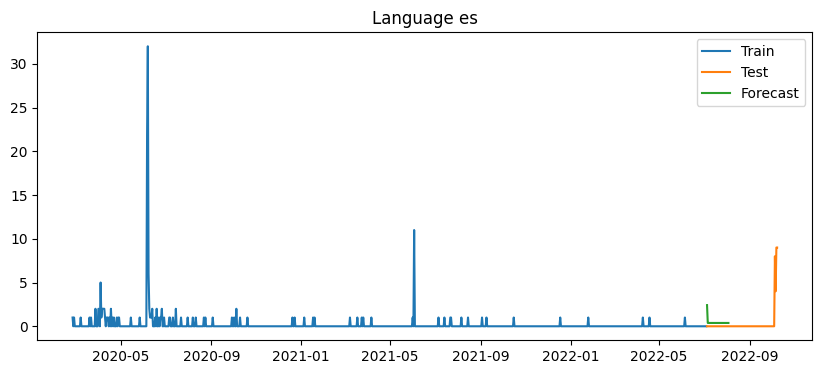

RMSE for language de: 1.693145876375951
Forecast for the next 30 days for language de: [1.67137377 1.91699579 2.00685658 2.03973214 2.05175966 2.05615993
 2.05776977 2.05835873 2.0585742  2.05865303 2.05868187 2.05869242
 2.05869628 2.05869769 2.05869821 2.0586984  2.05869847 2.05869849
 2.0586985  2.0586985  2.0586985  2.0586985  2.0586985  2.05869851
 2.05869851 2.05869851 2.05869851 2.05869851 2.05869851 2.05869851]


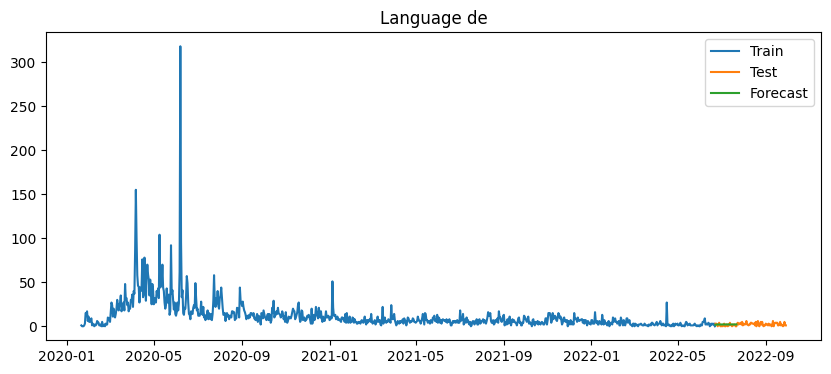

RMSE for language pt: 4.777333074595649
Forecast for the next 30 days for language pt: [2.0925938  1.60359486 2.01440269 2.25269725 2.06713731 1.95138069
 2.03499358 2.09106113 2.05348335 2.02639988 2.04324102 2.05629084
 2.04876606 2.04249297 2.04584402 2.04885284 2.04736589 2.04592576
 2.04658292 2.04727085 2.04698171 2.04665372 2.0467803  2.0469364
 2.0468813  2.04680713 2.04683097 2.04686614 2.04685591 2.04683926]


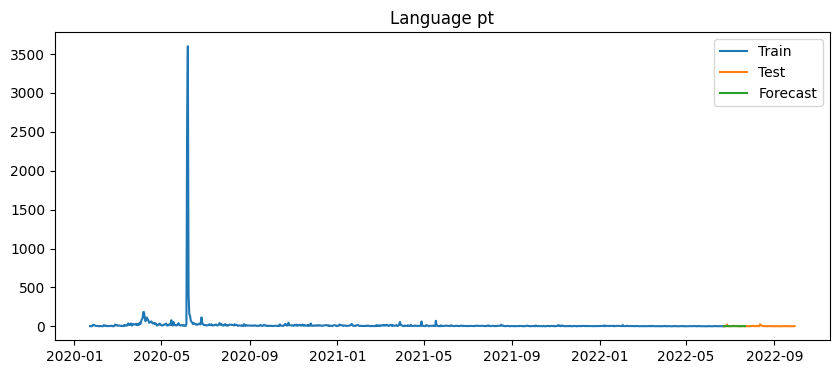

RMSE for language it: 2.3999459903065516
Forecast for the next 30 days for language it: [2.79859088 3.16523393 3.39020445 3.50828458 3.53258352 3.48835368
 3.40479642 3.30875763 3.2208126  3.15366839 3.11243254 3.09611516
 3.09971642 3.1163534  3.13904537 3.16195495 3.18104113 3.19419558
 3.201001   3.20227216 3.19952748 3.19450469 3.18879054 3.18359312
 3.17965133 3.17725418 3.17633202 3.17658132 3.17759078 3.17894651]


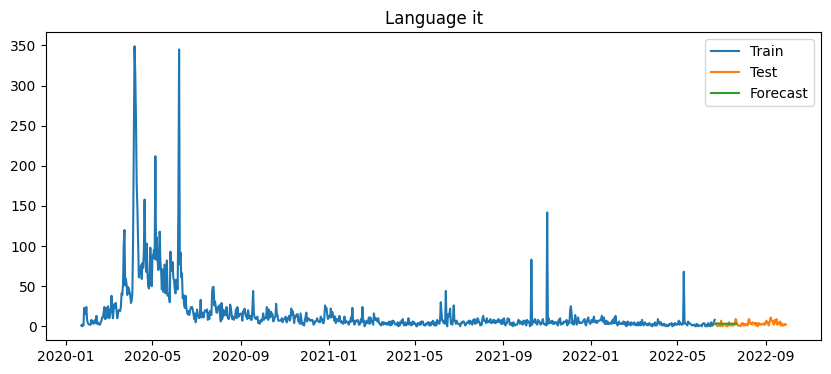

RMSE for language in: 0.26996059334722927
Forecast for the next 30 days for language in: [0.29522722 0.02630296 0.01346656 0.03229829 0.03833662 0.03837634
 0.03788782 0.03775541 0.03776079 0.03777315 0.03777597 0.0377757
 0.03777539 0.03777533 0.03777534 0.03777535 0.03777535 0.03777535
 0.03777535 0.03777535 0.03777535 0.03777535 0.03777535 0.03777535
 0.03777535 0.03777535 0.03777535 0.03777535 0.03777535 0.03777535]


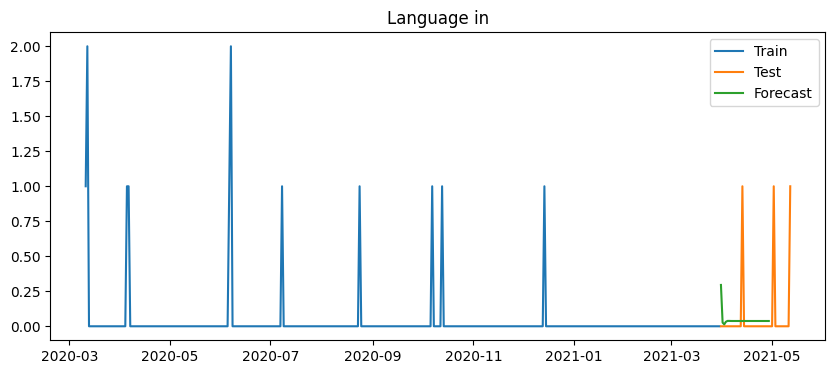

RMSE for language eu: 0.16359690413347627
Forecast for the next 30 days for language eu: [0.00819168 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168
 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168
 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168
 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168
 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168 0.00819168]


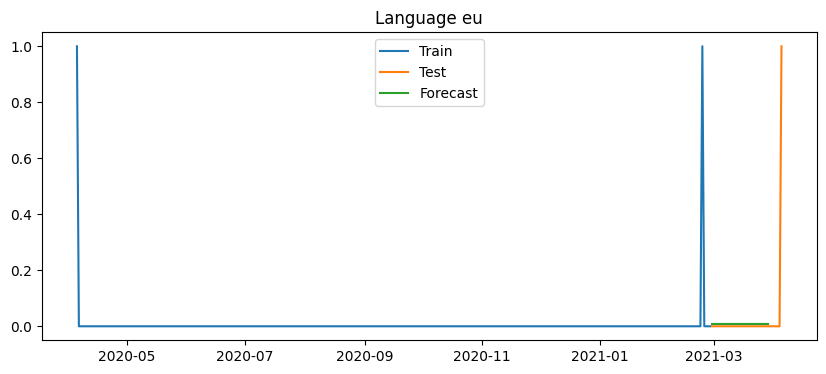

RMSE for language ht: 0.25217434029120595
Forecast for the next 30 days for language ht: [ 0.12669254 -0.0294768   0.03559433  0.05444846  0.05016013  0.04816078
  0.04838465  0.04857875  0.04857403  0.0485565   0.04855556  0.04855704
  0.04855724  0.04855712  0.04855709  0.0485571   0.04855711  0.0485571
  0.0485571   0.0485571   0.0485571   0.0485571   0.0485571   0.0485571
  0.0485571   0.0485571   0.0485571   0.0485571   0.0485571   0.0485571 ]


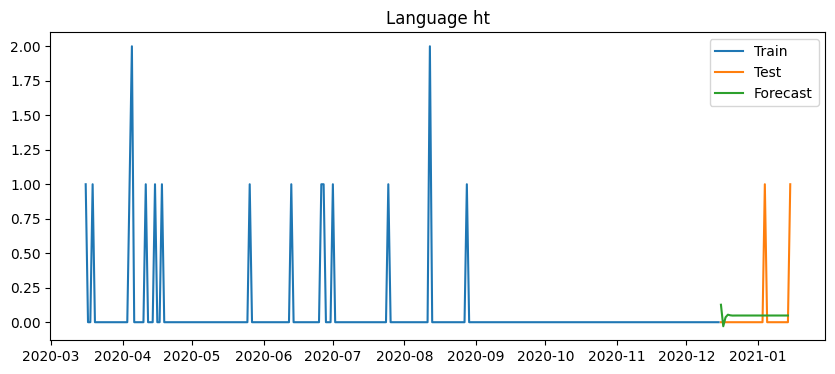

RMSE for language vi: 0.20387927158293967
Forecast for the next 30 days for language vi: [-0.03735064 -0.03980294 -0.03821831 -0.00208932 -0.00355423 -0.00517745
 -0.00666957 -0.00684038 -0.00705295 -0.00731583 -0.00762199 -0.0079235
 -0.00822185 -0.00851895 -0.00881636 -0.00911392 -0.0094115  -0.00970907
 -0.01000664 -0.0103042  -0.01060177 -0.01089933 -0.01119689 -0.01149446
 -0.01179202 -0.01208959 -0.01238715 -0.01268472 -0.01298228 -0.01327985]


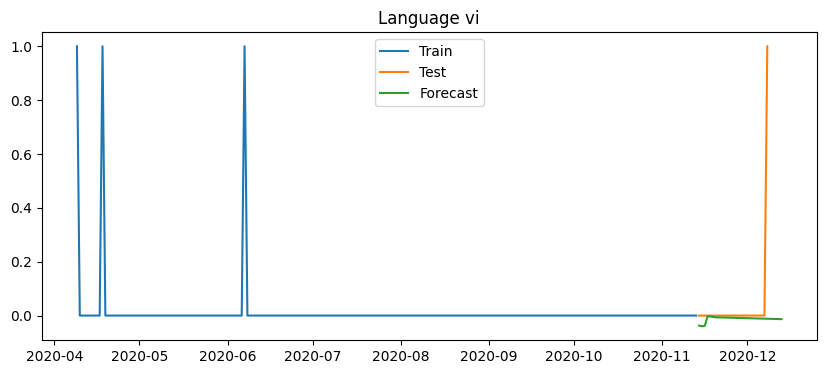

RMSE for language sv: 0.1862205847321463
Forecast for the next 30 days for language sv: [0.12866076 0.23787841 0.57151049 0.3079172  0.11828548 0.45905054
 0.47520351 0.14456615 0.28792966 0.53242064 0.27925081 0.16908103
 0.46183667 0.42573608 0.16566503 0.32467651 0.49479439 0.26248839
 0.21277719 0.45675034 0.38677345 0.1891822  0.35030923 0.46021028
 0.25479707 0.2492377  0.44654113 0.35712523 0.21308358 0.36693188]


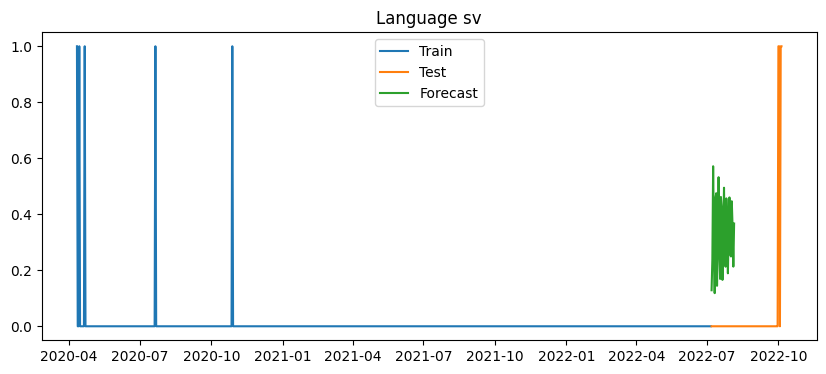

RMSE for language hu: 0.20499151640340466
Forecast for the next 30 days for language hu: [0.20681541 0.07948135 0.05903975 0.05575816 0.05523134 0.05514677
 0.05513319 0.05513101 0.05513067 0.05513061 0.0551306  0.0551306
 0.0551306  0.0551306  0.0551306  0.0551306  0.0551306  0.0551306
 0.0551306  0.0551306  0.0551306  0.0551306  0.0551306  0.0551306
 0.0551306  0.0551306  0.0551306  0.0551306  0.0551306  0.0551306 ]


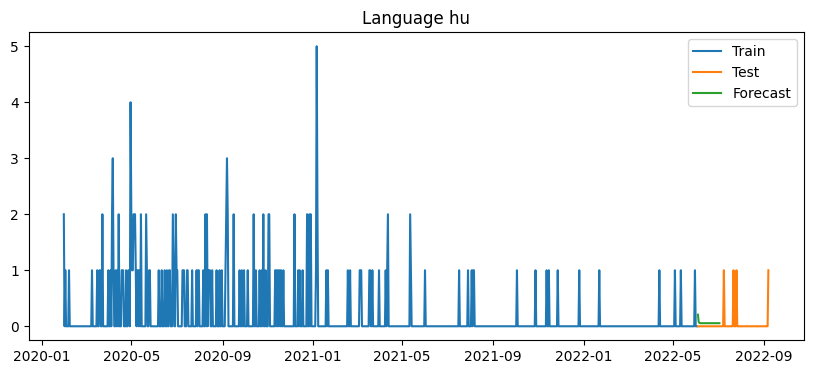

ValueError: ignored

In [ ]:
import pandas as pd
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/drive/MyDrive/פרוייקט גמר יקיר ומנגשה/la5g-ym.csv")
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

# Group by language and resample to daily tweet count
tweets_per_day_by_lang = df.groupby('lang').resample('D').count()['id']

# Get unique languages
languages = df['lang'].unique()
# Get the top 5 languages with the maximum number of days
top_5_languages = tweets_per_day_by_lang.groupby(level=0).size().nlargest(2).index

# Number of days to forecast ahead (e.g., next month)
forecast_days = 30

# Loop through the top 5 languages and fit the Auto ARIMA model
for lang in languages:
    lang_series = tweets_per_day_by_lang[lang]

    # Fill missing days with zeros
    lang_series = lang_series.reindex(pd.date_range(start=lang_series.index.min(), end=lang_series.index.max()), fill_value=0)

    # Split the data into training and testing sets (90% training, 10% testing)
    split_point = int(len(lang_series) * 0.90)
    train, test = lang_series[:split_point], lang_series[split_point:]

    # Fit the Auto ARIMA model (with weekly seasonality)
    model = pm.auto_arima(train, seasonal=False,m=7)

    # Store the one-step-ahead forecasts
    one_step_forecast = []
    for t in test.index:
        forecast = model.predict(n_periods=1)
        one_step_forecast.append(forecast[0])
        model.update(test[t])

    # Calculate the RMSE
    rmse = sqrt(mean_squared_error(test, one_step_forecast))
    print(f'RMSE for language {lang}: {rmse}')

    # Forecast the next month
    future_forecast = model.predict(n_periods=forecast_days)
    print(f"Forecast for the next {forecast_days} days for language {lang}: {future_forecast}")

    # Optional: Plot the forecasts
    plt.figure(figsize=(10, 4))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(pd.date_range(start=test.index.min(), periods=forecast_days, freq='D'), future_forecast, label='Forecast')
    plt.legend()
    plt.title(f'Language {lang}')
    plt.show()


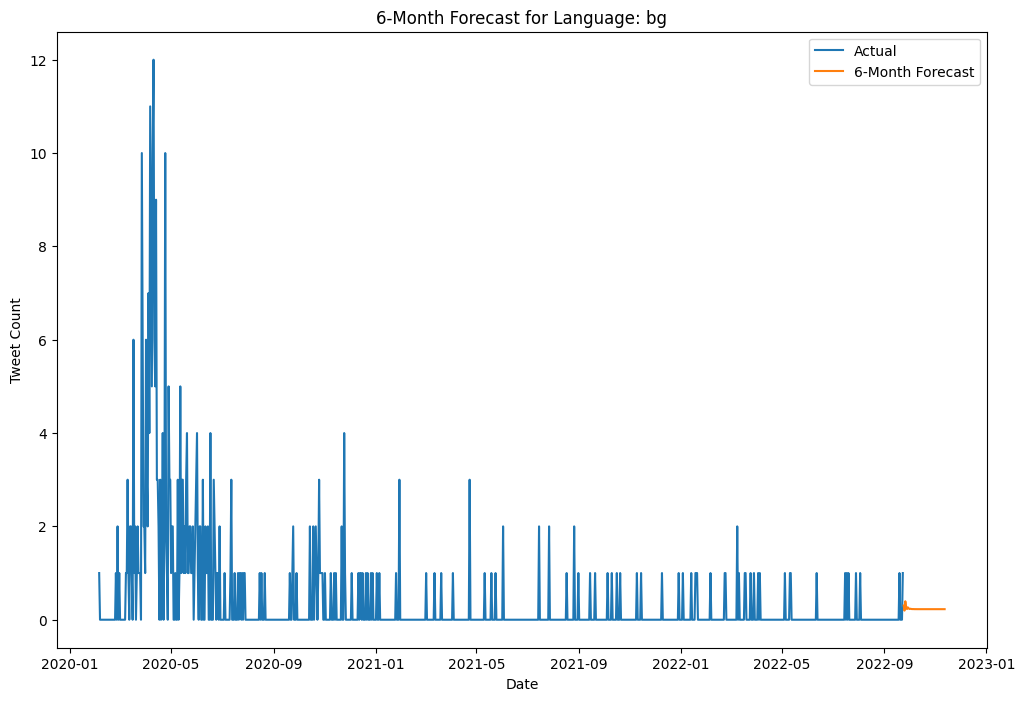

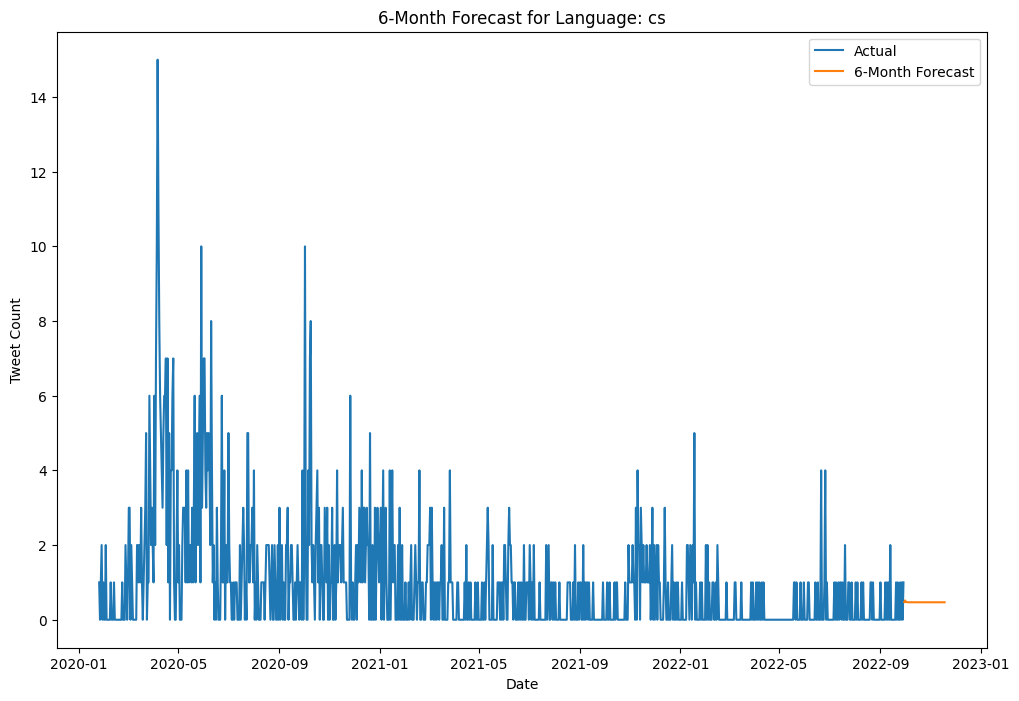

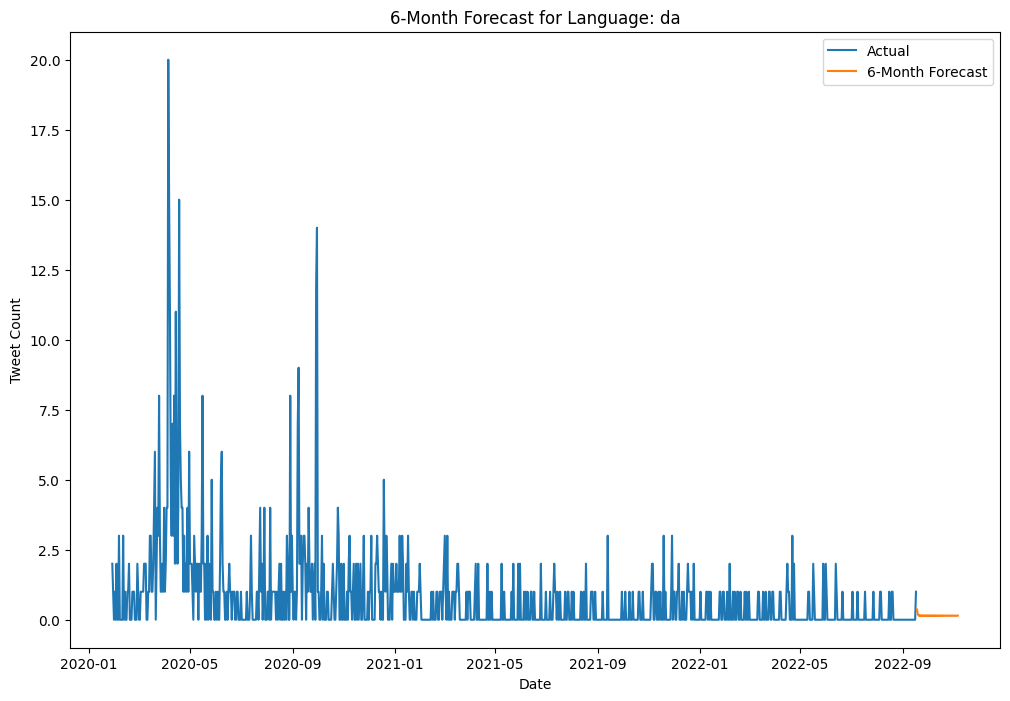

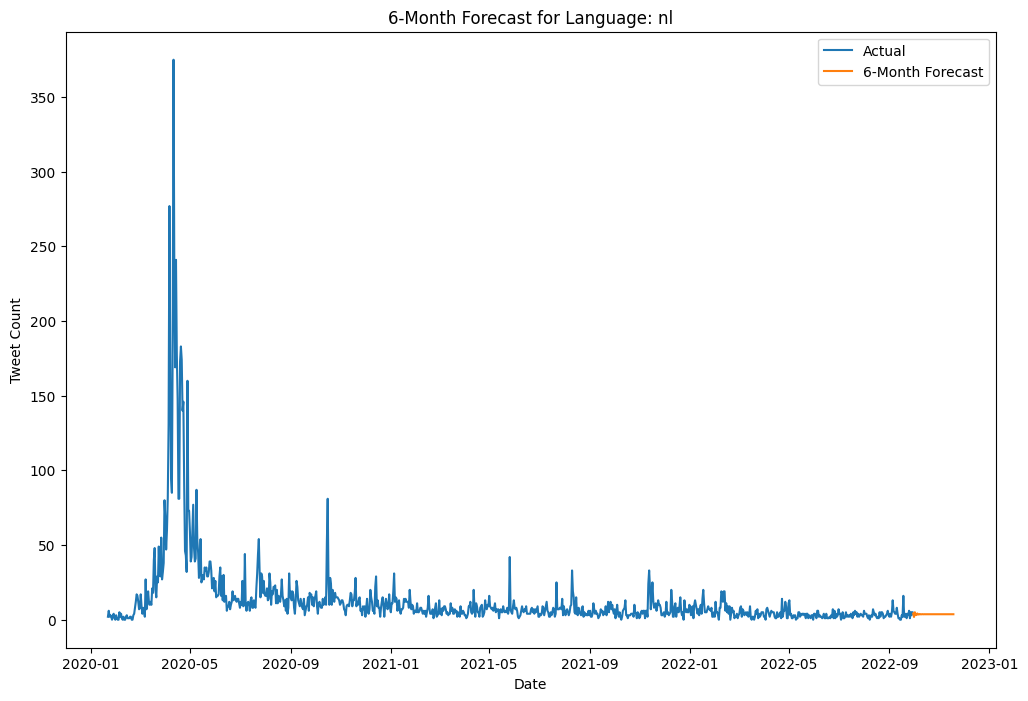

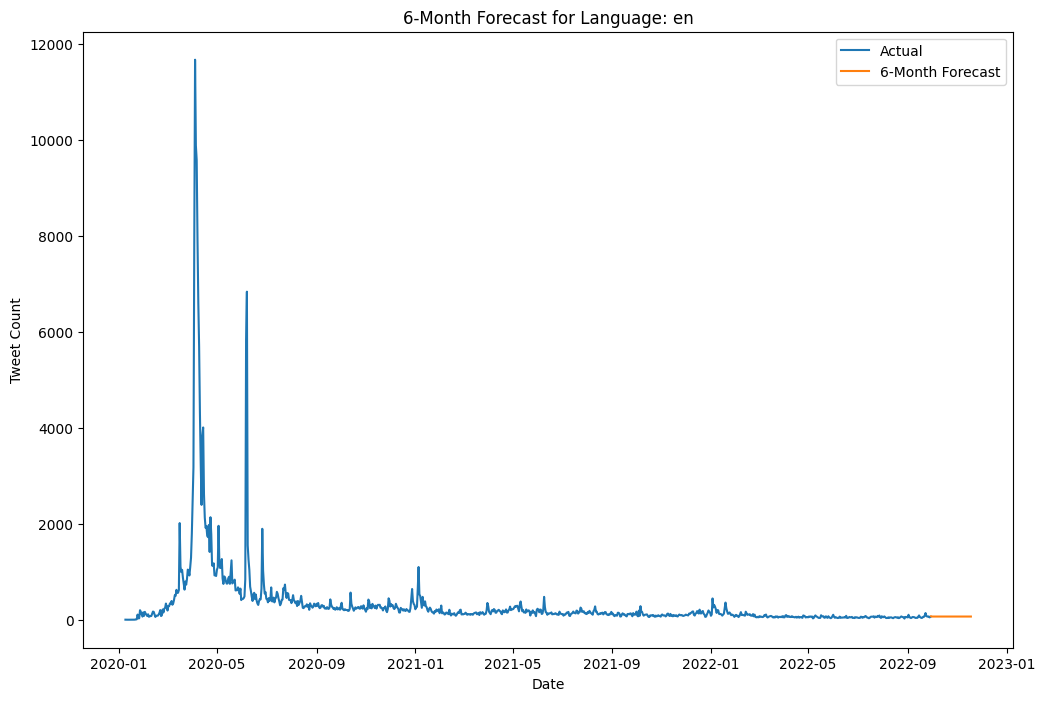

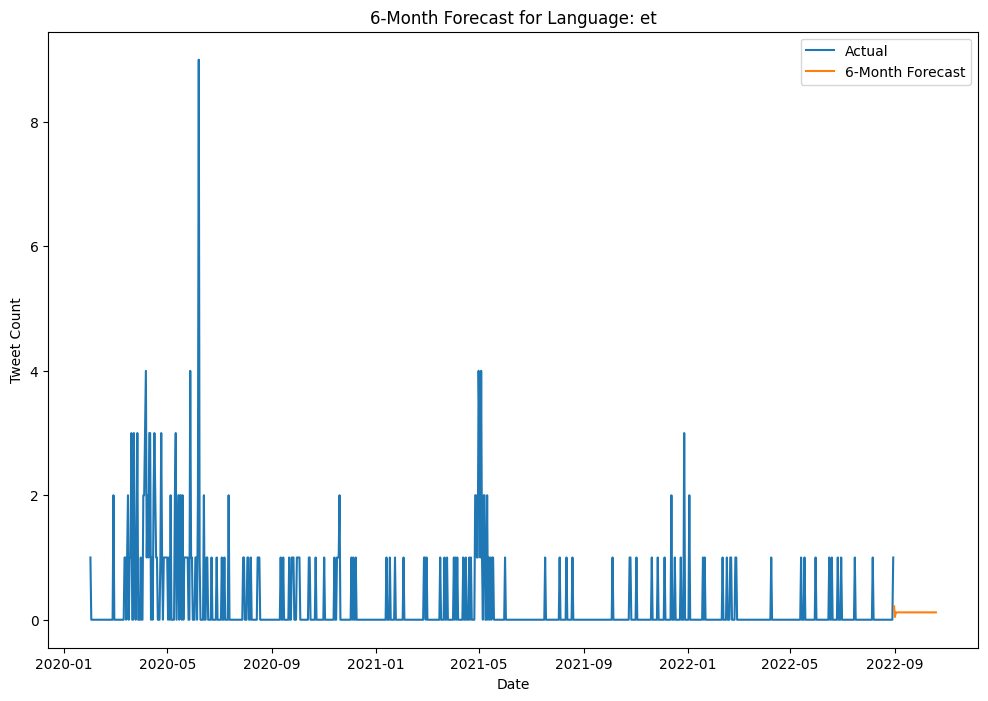

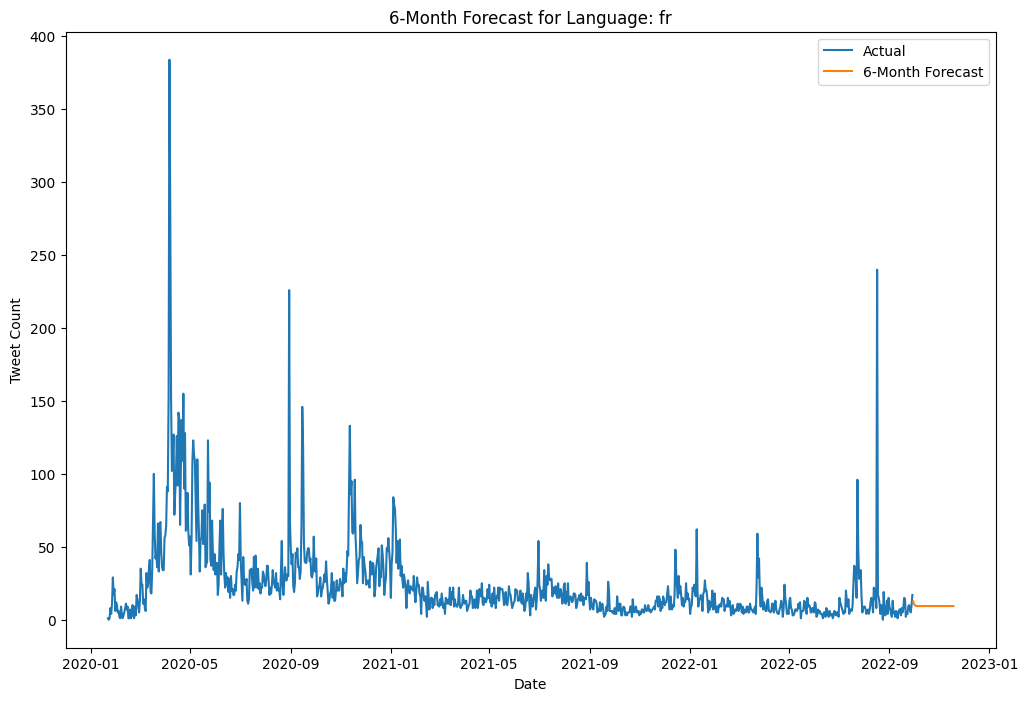

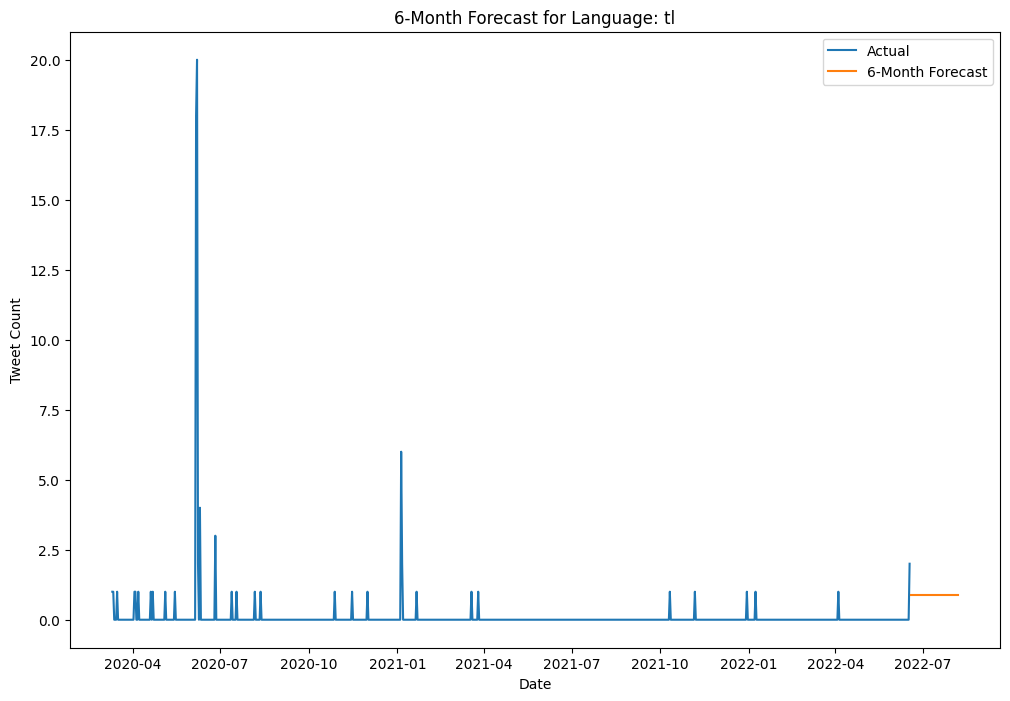

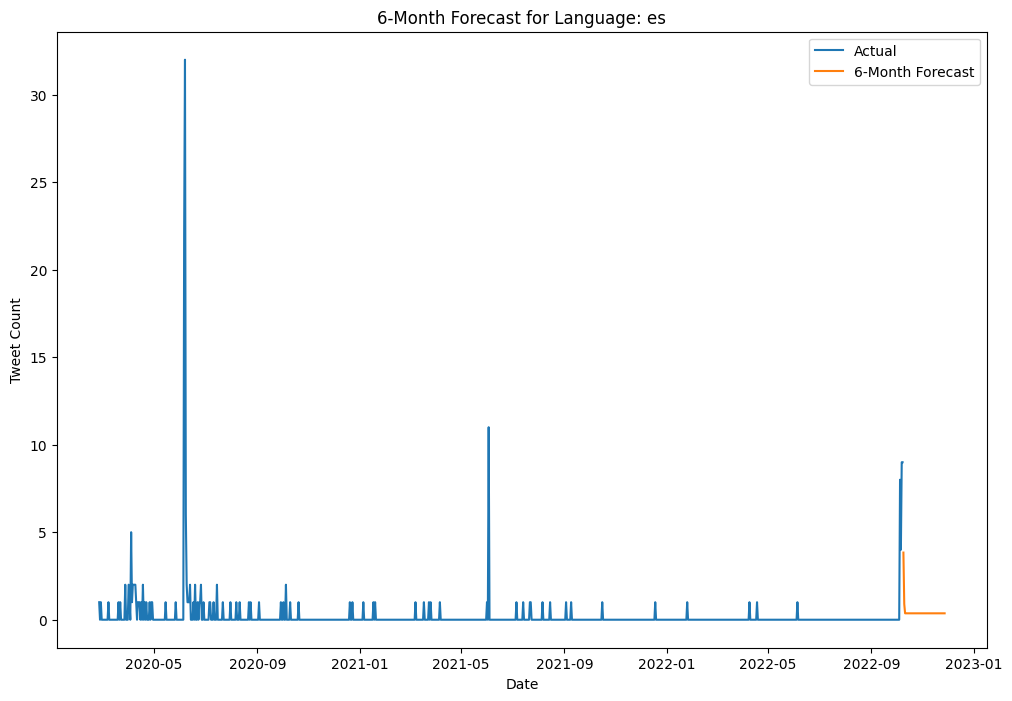

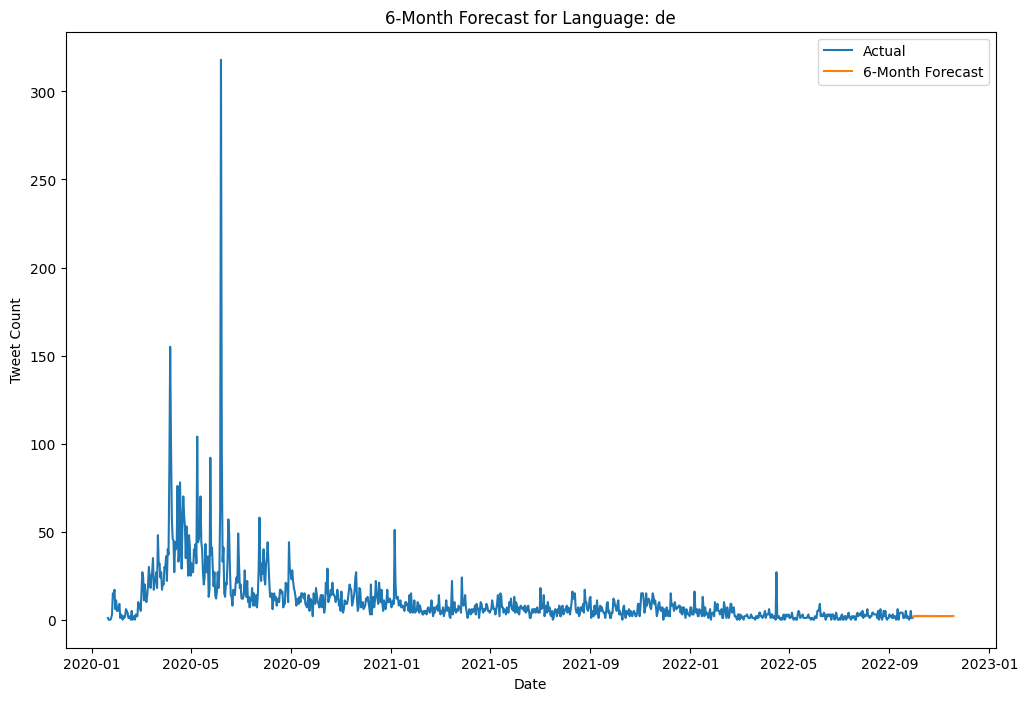

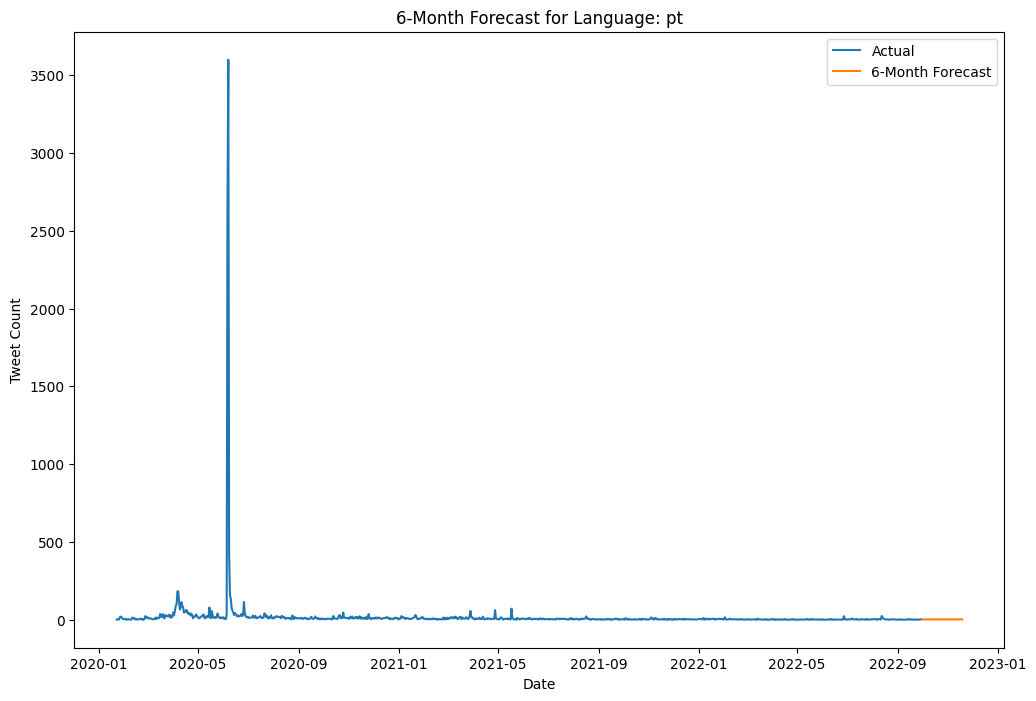

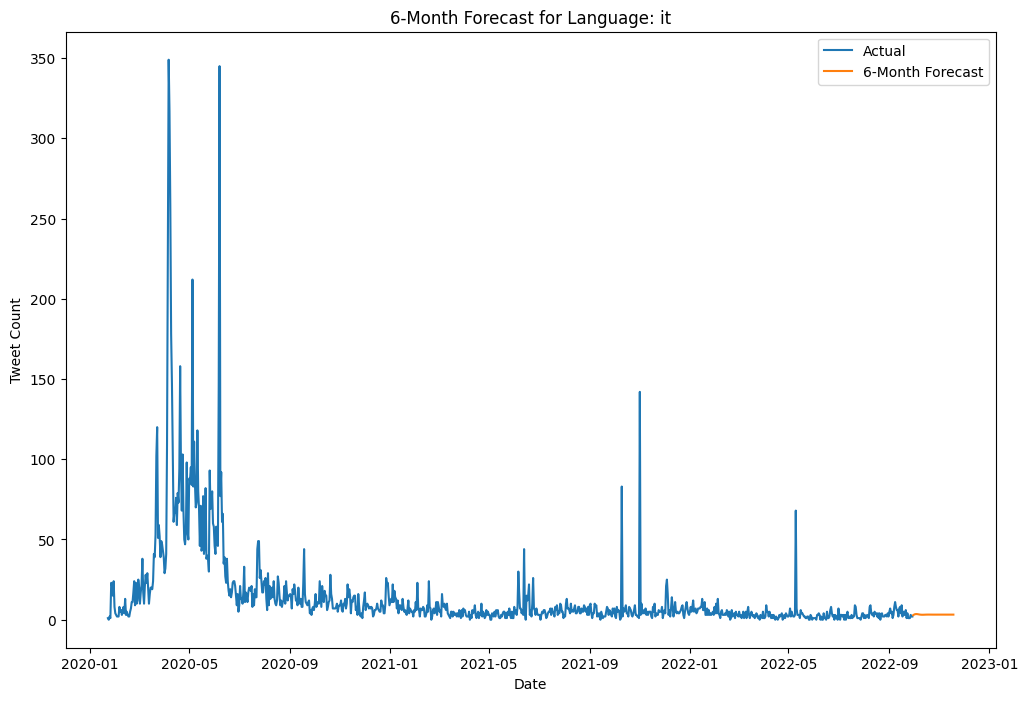

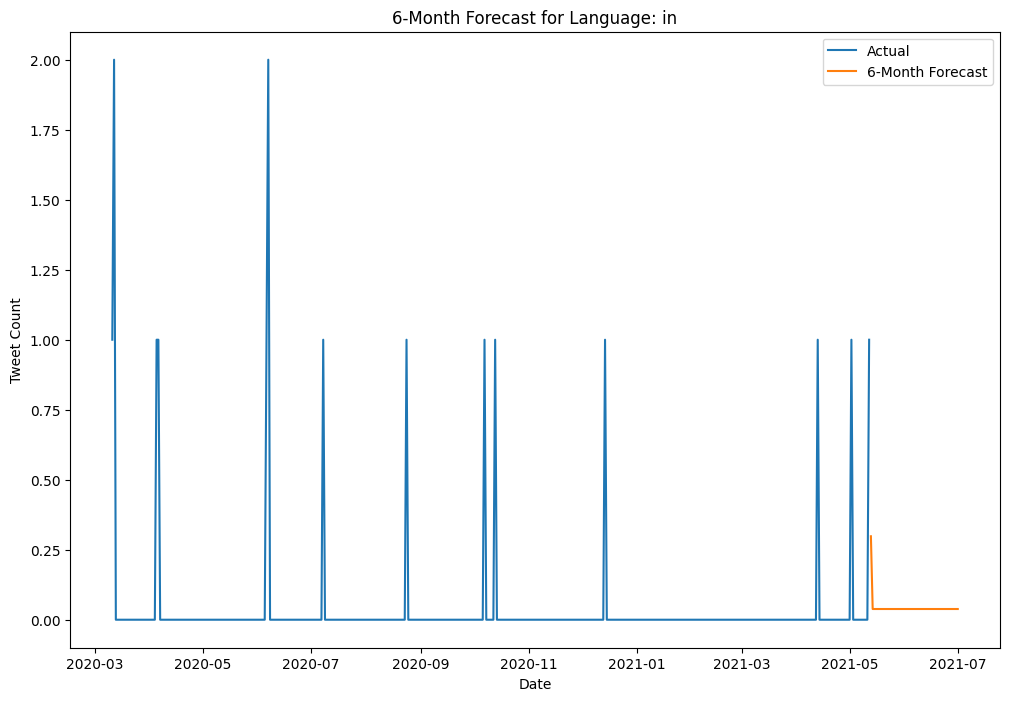

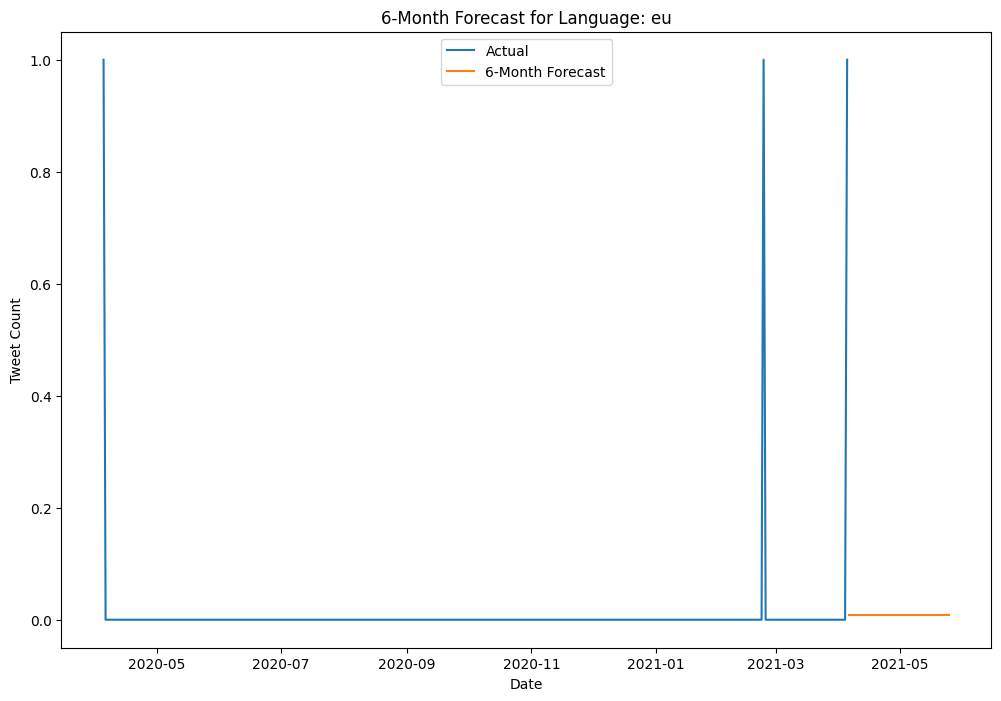

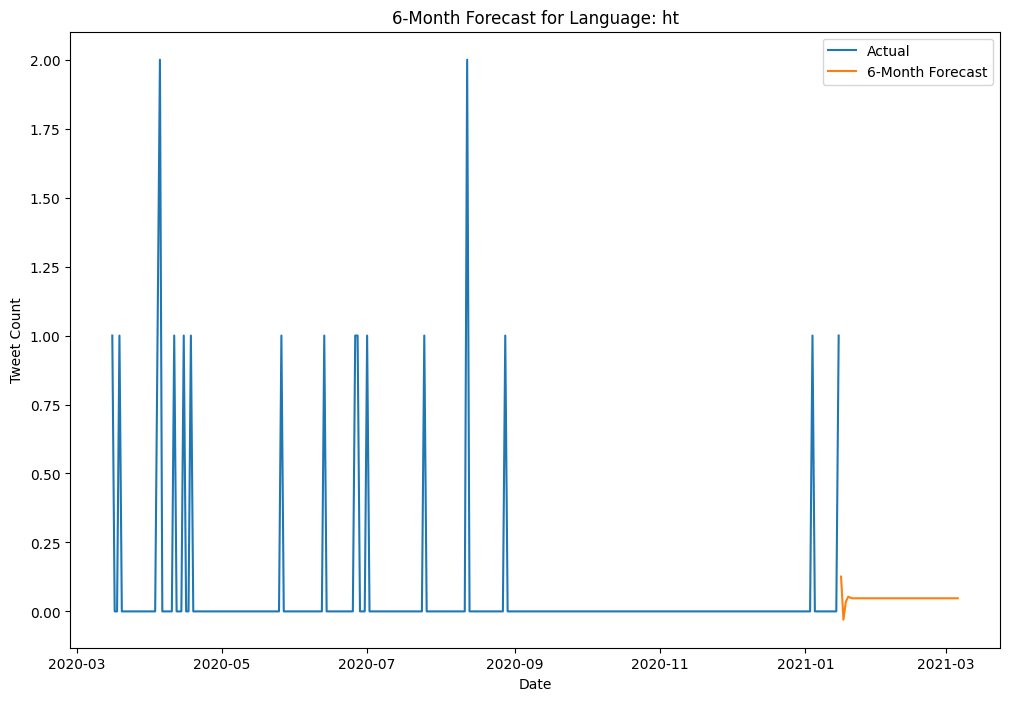

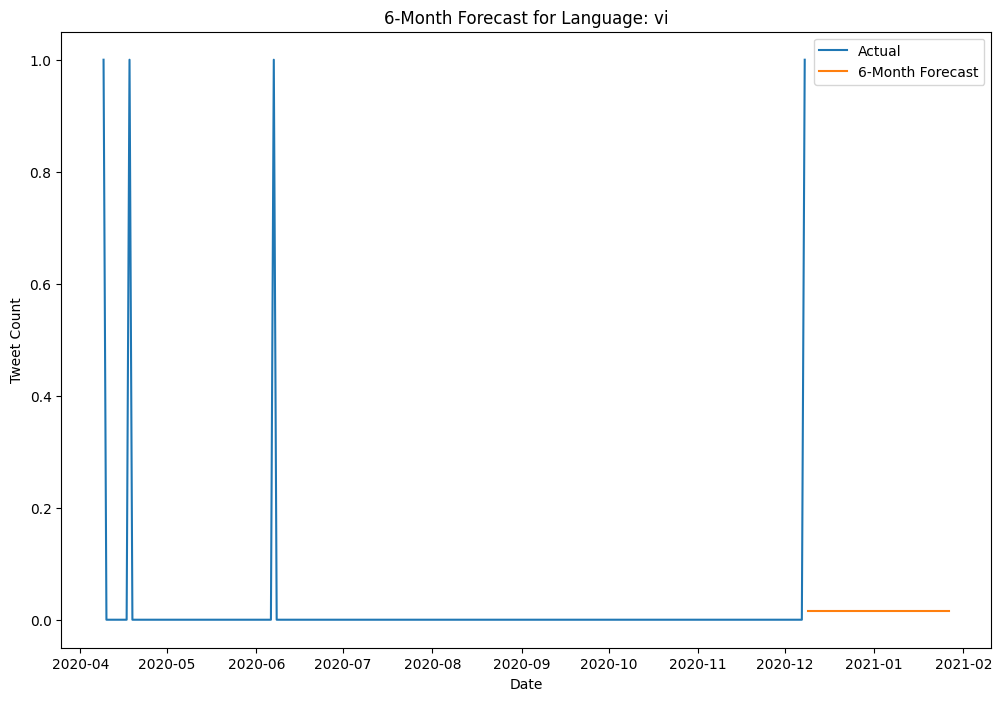

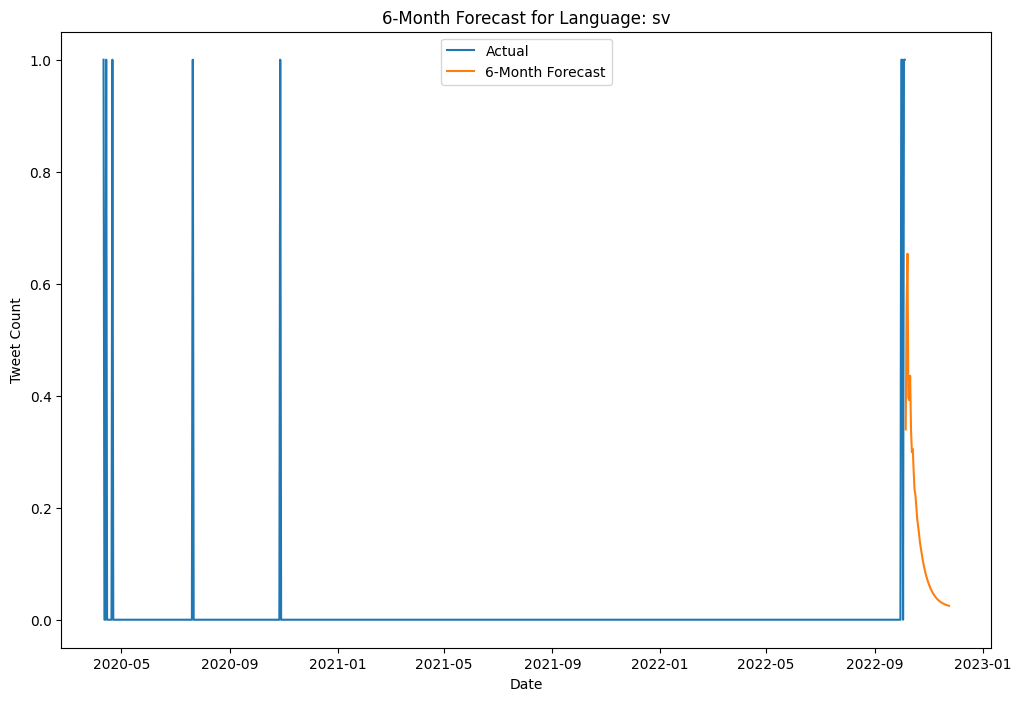

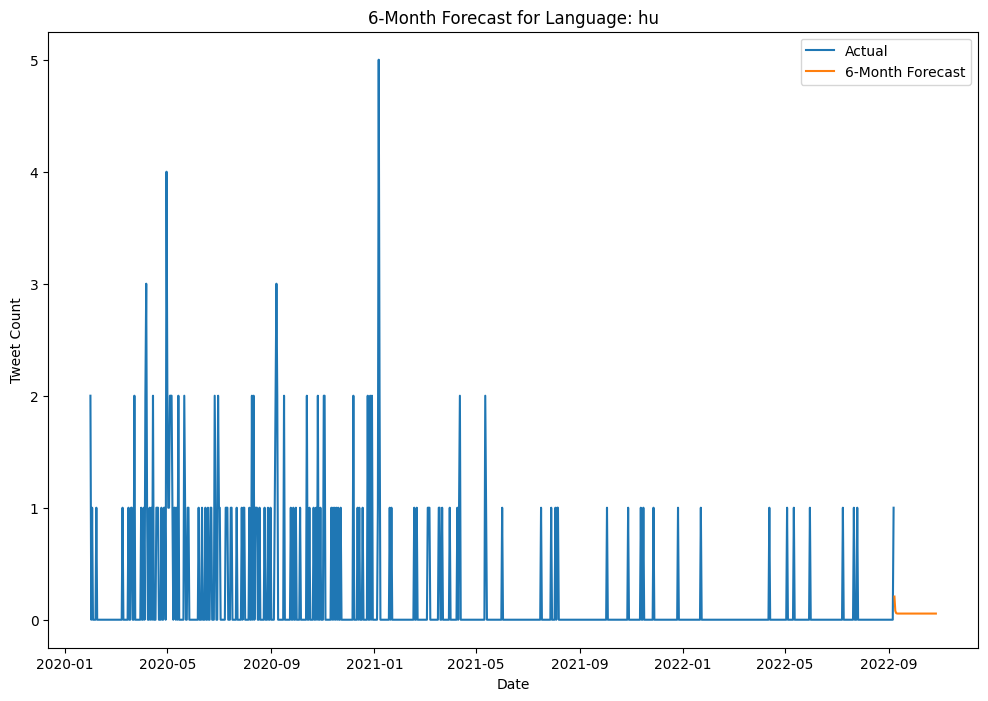

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


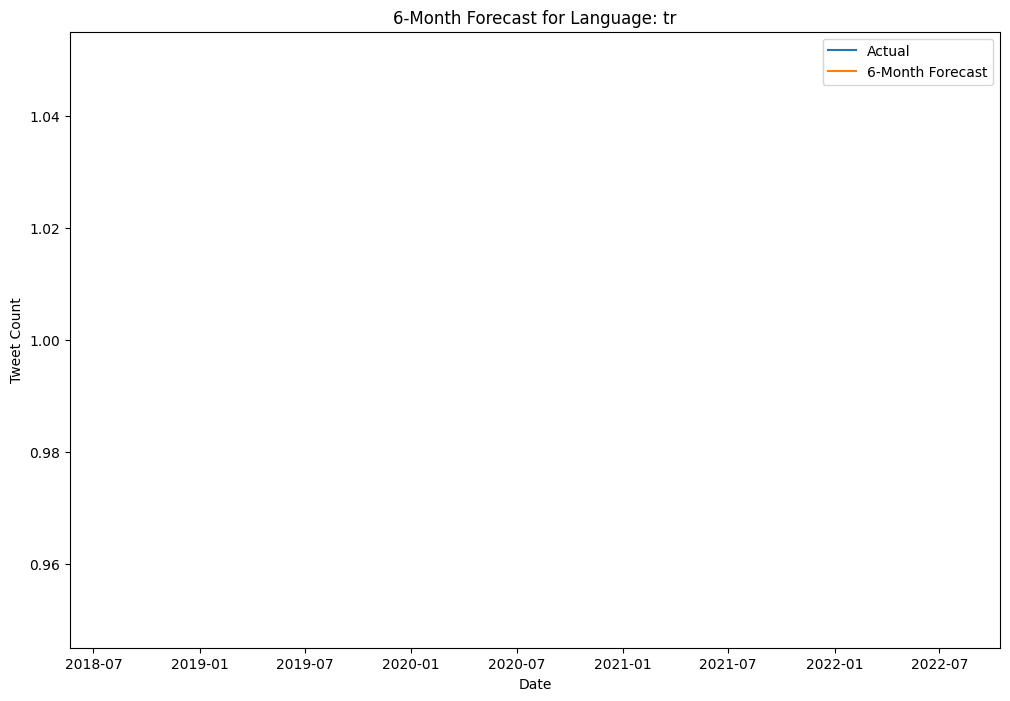

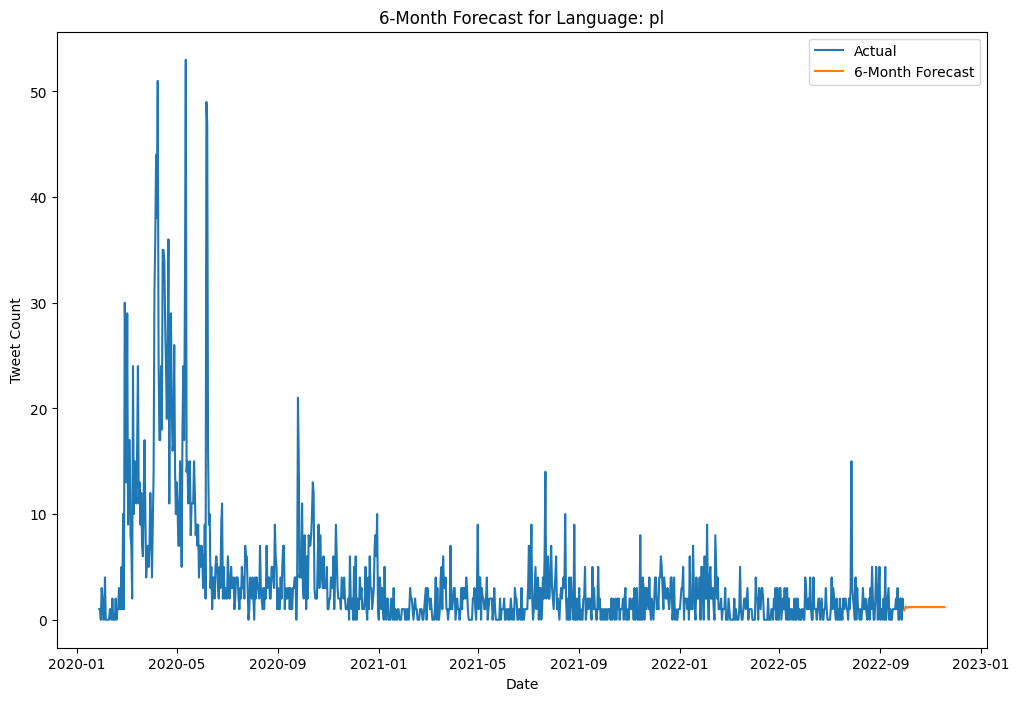

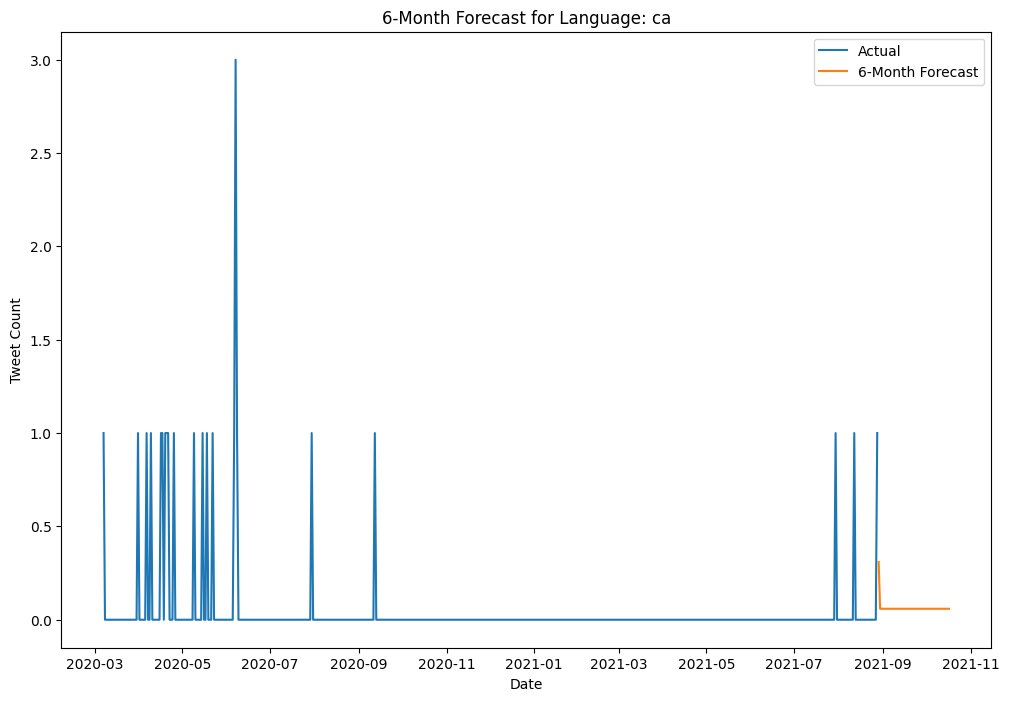

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


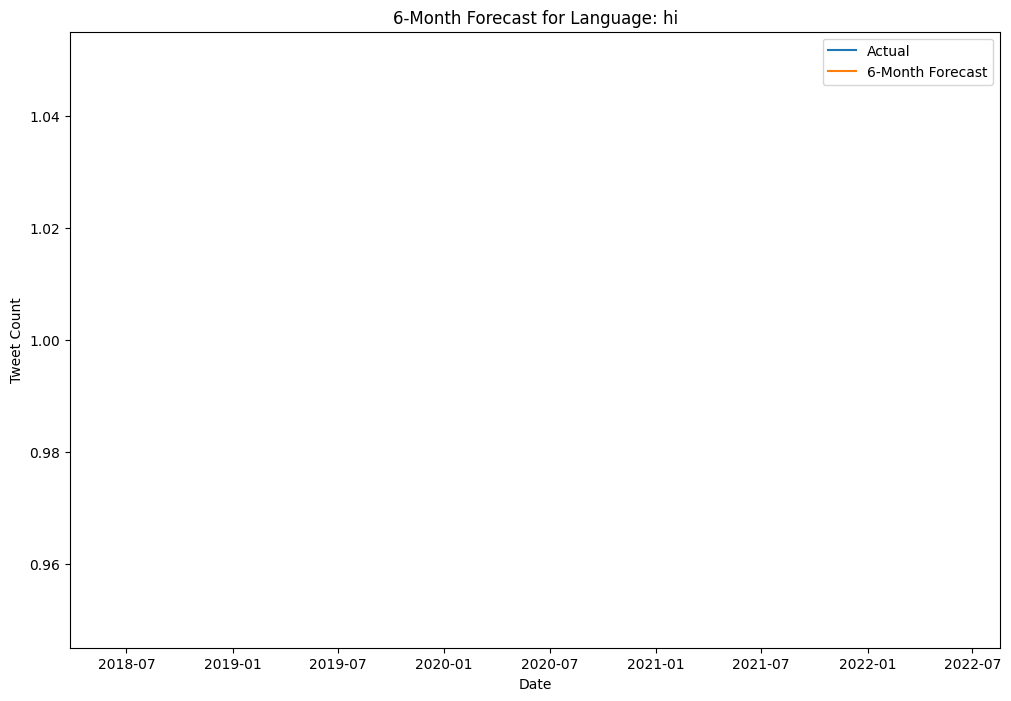

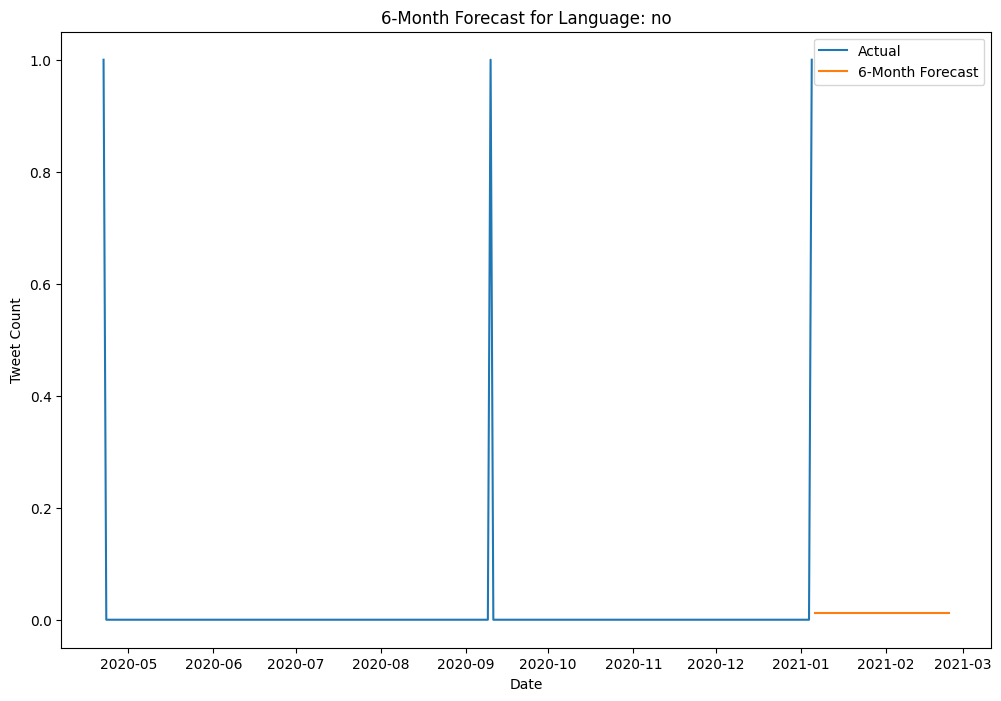

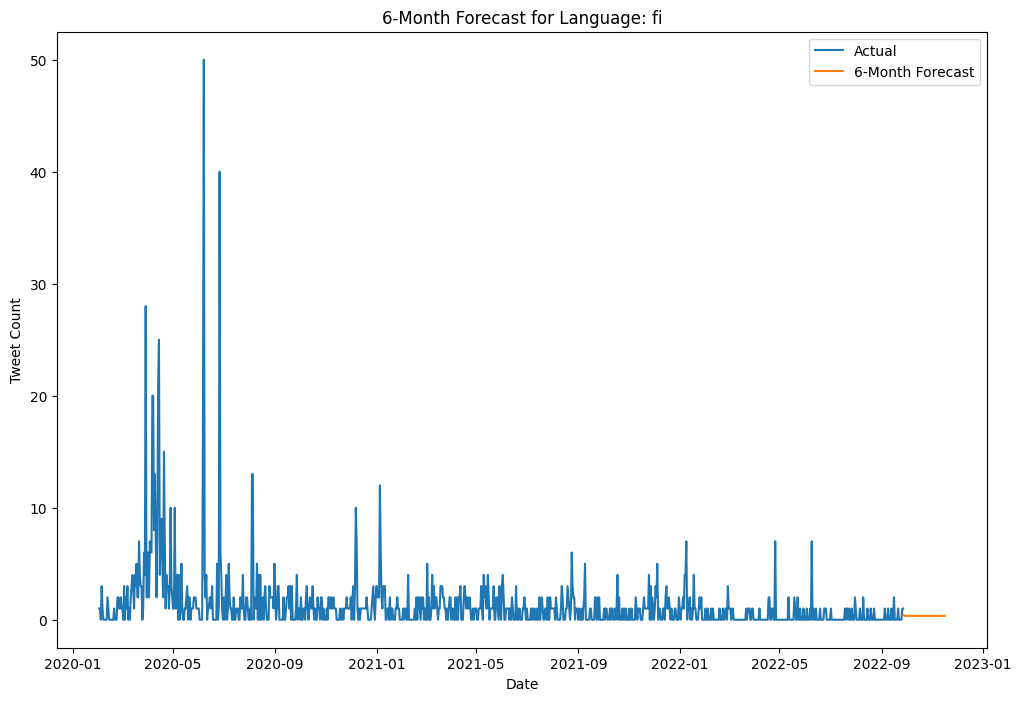

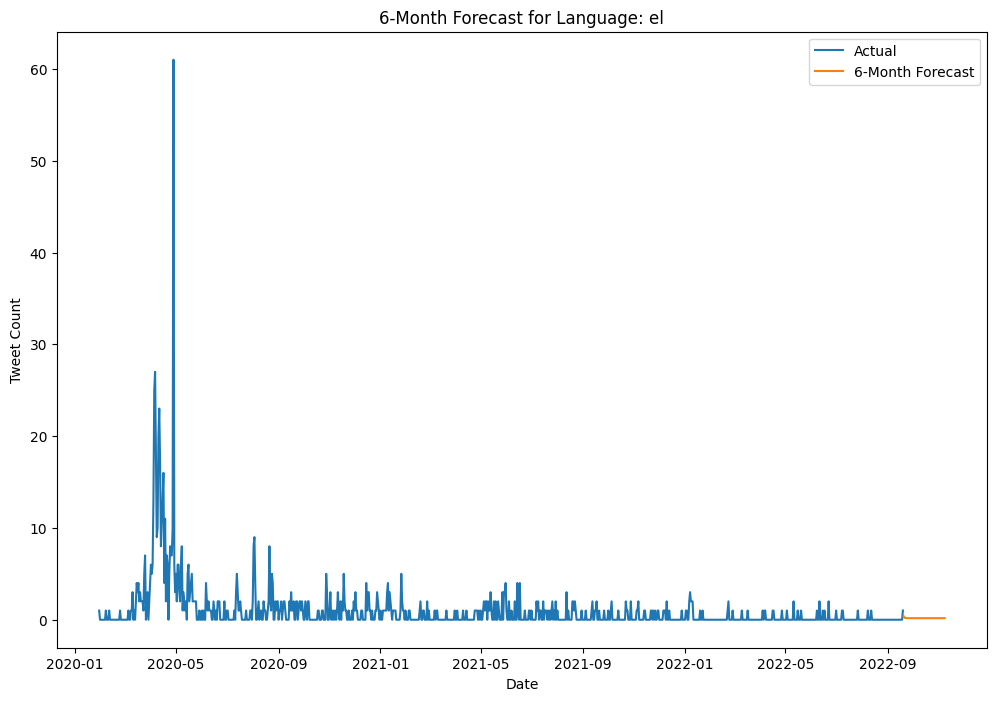

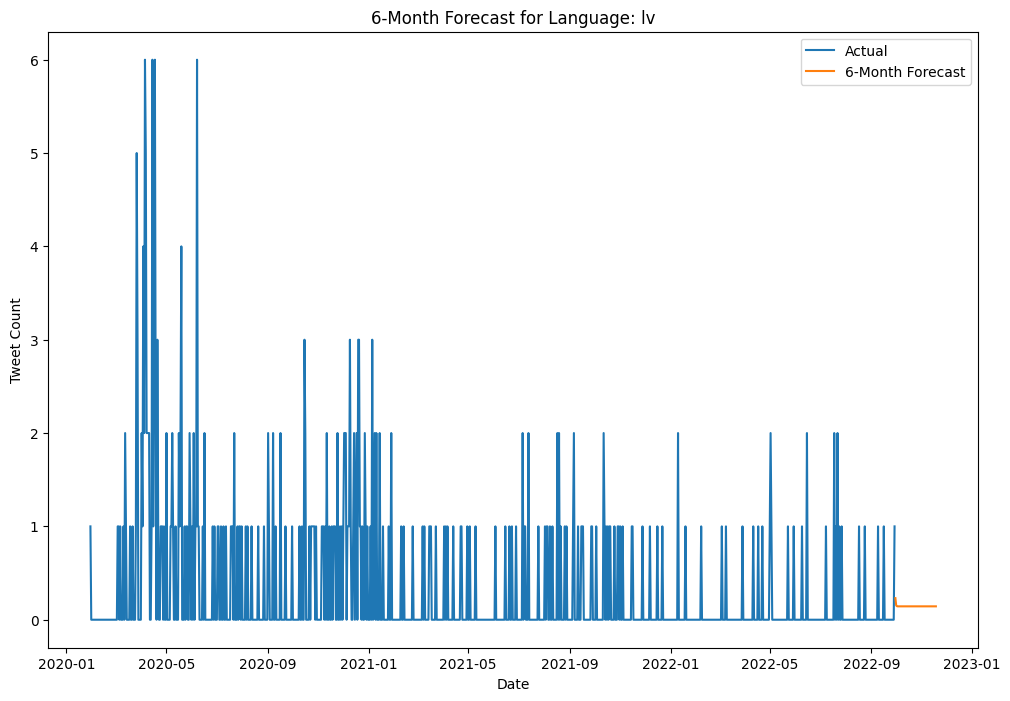

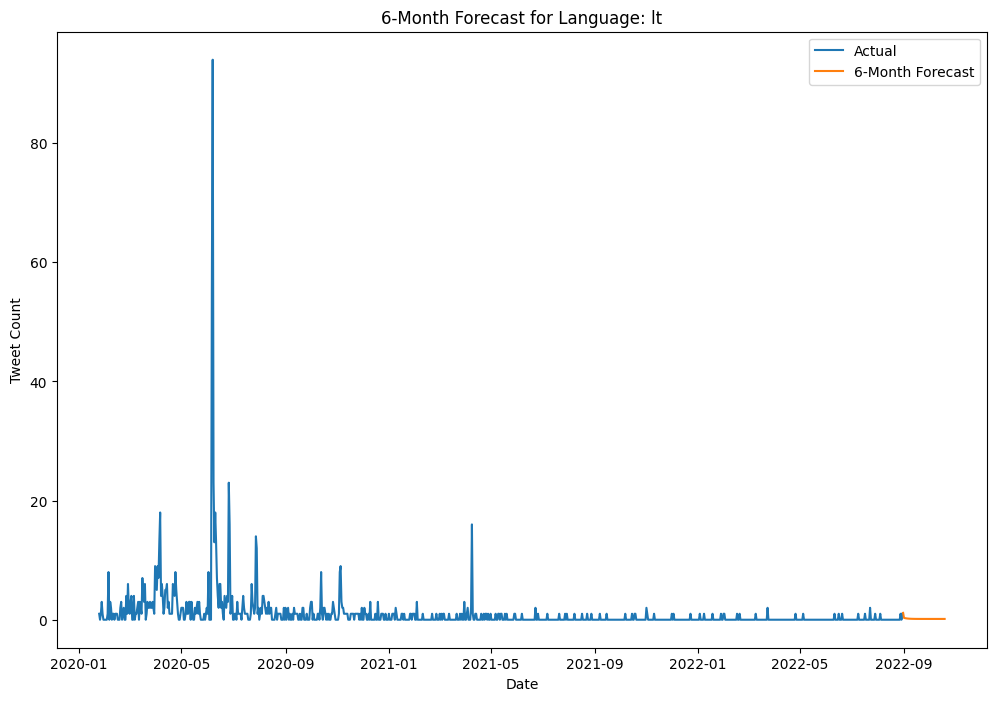

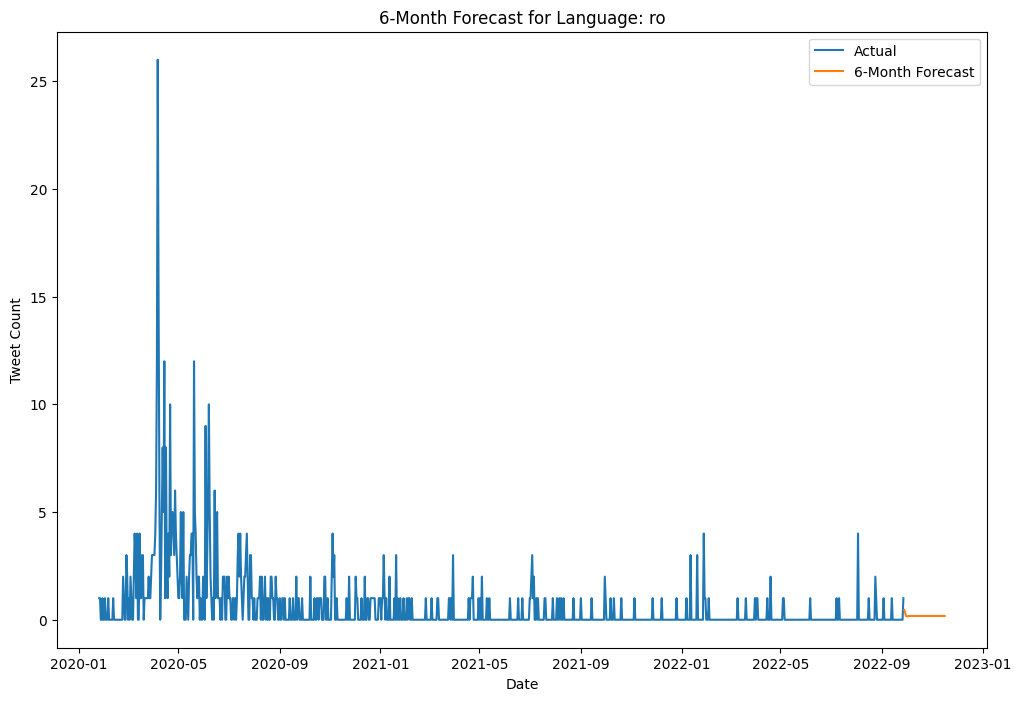

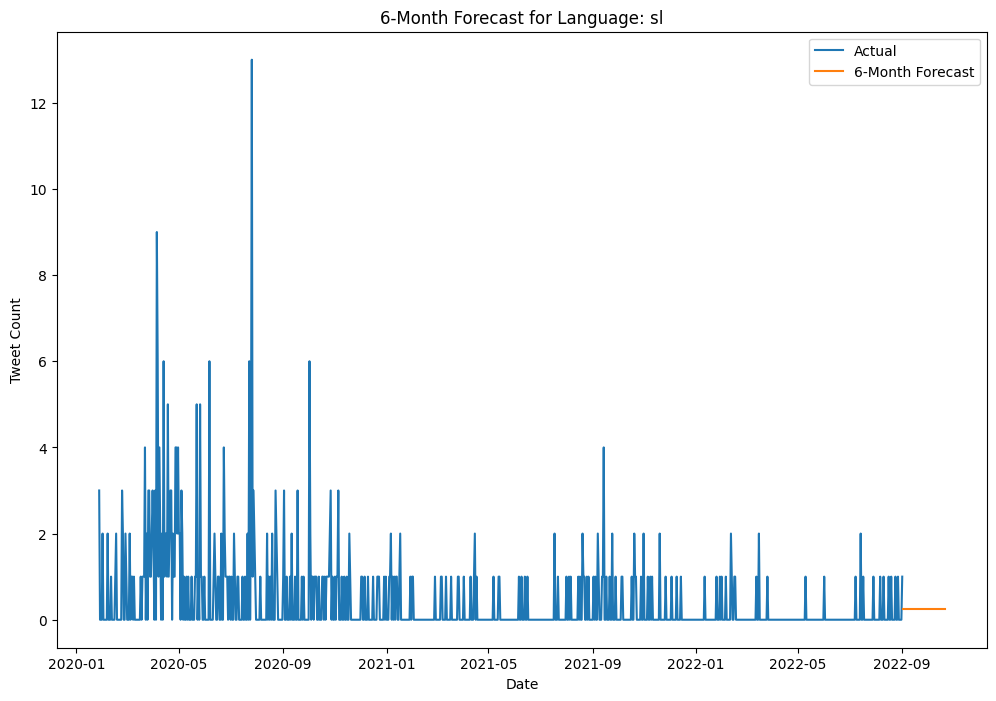

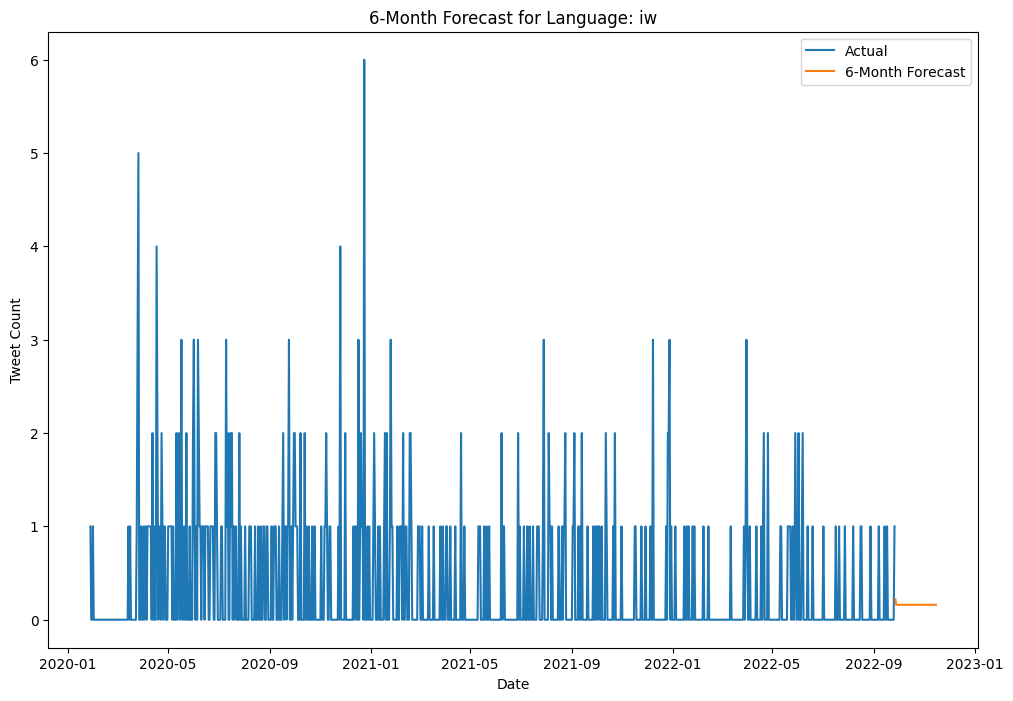

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


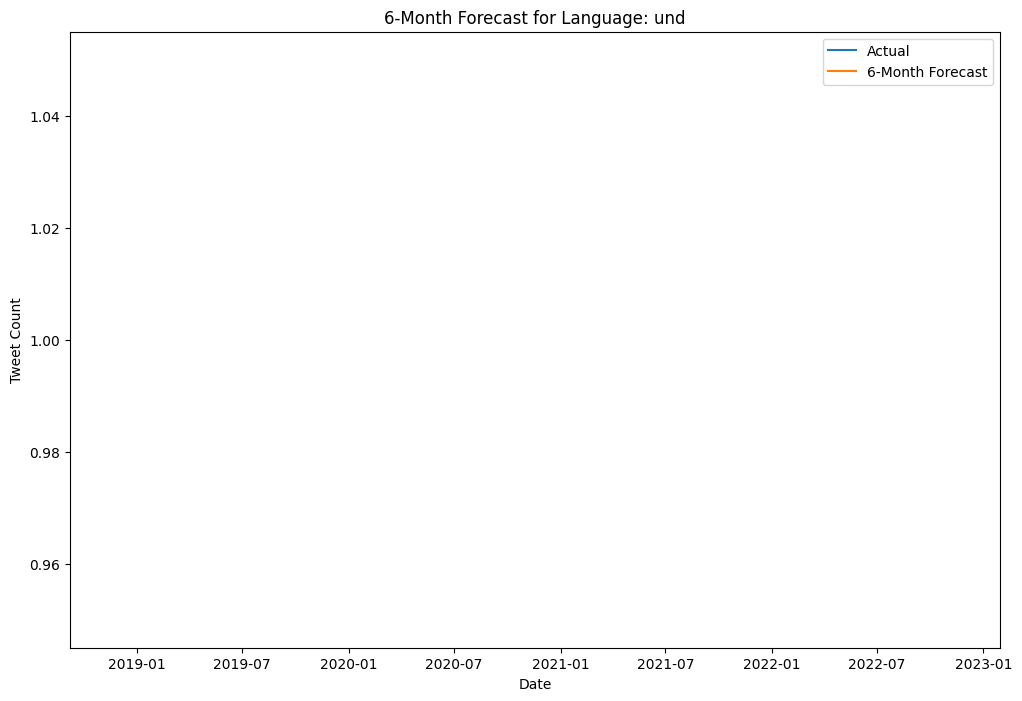

In [ ]:
# Number of periods to forecast (6 months)
forecast_periods = 50

for lang in languages:
    lang_data = tweets_per_day_by_lang[tweets_per_day_by_lang['lang'] == lang]
    lang_data.set_index('created_at', inplace=True)
    lang_series = lang_data['id']

    # Check if there are missing days
    if lang_series.resample('D').count().min() == 0:
        print(f"Skipping language {lang} due to missing days.")
        continue

    # Ensure data is ordered by time
    lang_series.sort_index(inplace=True)

    # Fit auto ARIMA model on the full data
    model = pm.auto_arima(lang_series, suppress_warnings=True, seasonal=True, stepwise=True)

    # Make the six-month-ahead forecast
    forecast = model.predict(n_periods=forecast_periods)

    # Create a datetime index for the forecast
    forecast_index = pd.date_range(lang_series.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, freq='D')

    # Convert the forecast to a pandas Series
    forecast_series = pd.Series(forecast, index=forecast_index)

    # Plot the actual values and the forecasted values
    plt.figure(figsize=(12, 8))
    plt.plot(lang_series.index, lang_series, label='Actual')
    plt.plot(forecast_index, forecast_series, label='6-Month Forecast')
    plt.xlabel('Date')
    plt.ylabel('Tweet Count')
    plt.title(f"6-Month Forecast for Language: {lang}")
    plt.legend()
    plt.show()


In [ ]:
import plotly.graph_objects as go

# Create a simple graph
fig = go.Figure(
    data=[go.Bar(y=[2, 3, 1])]
)

# Define the path to save the file in your Google Drive
file_path = "/content/drive/My Drive/graph.html"

# Export the graph as a HTML file
fig.write_html(file_path)

